<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Applied_Statistics/Linear_Model_Selection_Regularization_Ch6_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Linear Model Selection and Regularization (Chapter 6)**

---

###**6.5 Lab: Linear Models and Regularization**

In this lab we implement many of the techniques discussed in this chapter. We first import some of th libaries needed.

####**6.5.1 Subset Selection Methods**



#####***Best Subset Selection***

Here we apply the best subset selection approach to the `Hitters` data. We wish to predict a beseball player's `Salary` on the basis of various statistics associated with performance in the previous year.

First of all, we note that the `Salary` variable is missing for some of the players. The `is.na()` function can be used to identify the missing observations. It returns a vector of the same length as the input vector, with a `TRUE` for any elements that are missing, and `FALSE` for non-missing elements. The `sum()` function can then be used to count all of the missing elements.

In [ ]:
install.packages("ISLR2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ISLR2)
print(head(Hitters))
print(names(Hitters))

                  AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun
-Andy Allanson      293   66     1   30  29    14     1    293    66      1
-Alan Ashby         315   81     7   24  38    39    14   3449   835     69
-Alvin Davis        479  130    18   66  72    76     3   1624   457     63
-Andre Dawson       496  141    20   65  78    37    11   5628  1575    225
-Andres Galarraga   321   87    10   39  42    30     2    396   101     12
-Alfredo Griffin    594  169     4   74  51    35    11   4408  1133     19
                  CRuns CRBI CWalks League Division PutOuts Assists Errors
-Andy Allanson       30   29     14      A        E     446      33     20
-Alan Ashby         321  414    375      N        W     632      43     10
-Alvin Davis        224  266    263      A        W     880      82     14
-Andre Dawson       828  838    354      N        E     200      11      3
-Andres Galarraga    48   46     33      N        E     805      40      4
-Alfredo Griffin  

In [ ]:
print(dim(Hitters))

[1] 322  20


In [ ]:
print(str(Hitters))

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

In [ ]:
print(sum(is.na(Hitters$Salary)))

[1] 59


Hence we see that `Salary` is missing for 59 players. The `na.omit()` function removes all of the rows that have missing values in any variable.

In [ ]:
Hitters <- na.omit(Hitters)
print(dim(Hitters))

[1] 263  20


In [ ]:
print(sum(is.na(Hitters)))

[1] 0


The `regsubsets()` function (part of the `leaps` library) performs best subset selection by identifying the best model that contains a given number of predictors, where *best* is quantified using RSS. The syntax is the same as for `lm()`. The `summary()` command outputs the best set of variables for each model size.

In [ ]:
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(leaps)
regfit.full <- regsubsets(Salary ~ ., Hitters)
print(summary(regfit.full))

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

An asterisk indicates that a given variable is included in the corresponding model. For instance, this output indicates that the best two-variable model contains only `Hits` and `CRBI`. By default,  `regsubsets()` only reports results up to the best eight-variable model. But the `nvmax` option can be used in order to return as many variabels as are desired. Here we fit up to a 19-variable model.  

In [ ]:
dim(Hitters)[2] - 1

[1] 19

In [ ]:
regfit.full <- regsubsets(Salary ~ ., Hitters, nvmax = dim(Hitters)[2] - 1)
reg.summary <- summary(regfit.full)

In [ ]:
print(reg.summary)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = dim(Hitters)[2] - 
    1)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  (

The `summary()` function also returns $R^2$, $RSS$, adjusted $R^2$, $C_p$, and $BIC$. We can examine these to try to select the *best* overall model.

In [ ]:
print(names(reg.summary))

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   


For instance, we see that the $R^2$ statistic increases from 32%, when only one variable is included in the model, to almost 55%, when all variables are included. As expected, the $R^2$ statistic increases monotonically are more variables are included.

In [ ]:
print(reg.summary$rsq)
print("-----------------")
print(reg.summary$adjr2)
#print(reg.summary$bic)

 [1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159
[1] "-----------------"
 [1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001 0.5007849
 [8] 0.5137083 0.5180572 0.5222606 0.5225706 0.5217245 0.5206736 0.5195431
[15] 0.5178661 0.5162219 0.5144464 0.5126097 0.5106270


Plotting RSS, adjusted $R^2$, $C_p$, and BIC for all of the models at once will help us decide which model to select. Note the `type = "l"` option tells `R` to connect the plotted points with lines.

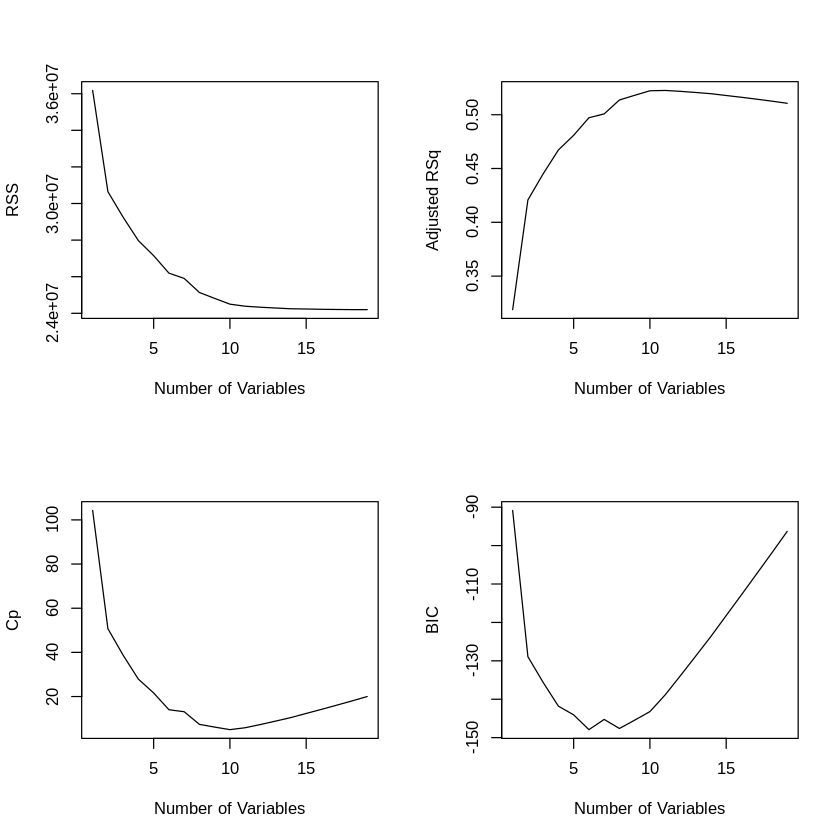

In [ ]:
par(mfrow = c(2, 2))
plot(reg.summary$rss, xlab = "Number of Variables",
     ylab = "RSS", type = "l")
plot(reg.summary$adjr2, xlab = "Number of Variables",
     ylab = "Adjusted RSq", type = "l")
plot(reg.summary$cp, xlab = "Number of Variables",
     ylab = "Cp", type = "l")
plot(reg.summary$bic, xlab = "Number of Variables",
     ylab = "BIC", type = "l")

The `points()` command works like the `plot()` command, except that it puts points on a plot that has been created, instead of creating a new plot. The `which.max()` function can be used to identify the location of the maximum point of a vector. We will now plot a red dot to indicate the model with the largest adjusted $R^2$ statistic.

In [ ]:
print(which.max(reg.summary$adjr2))

[1] 11


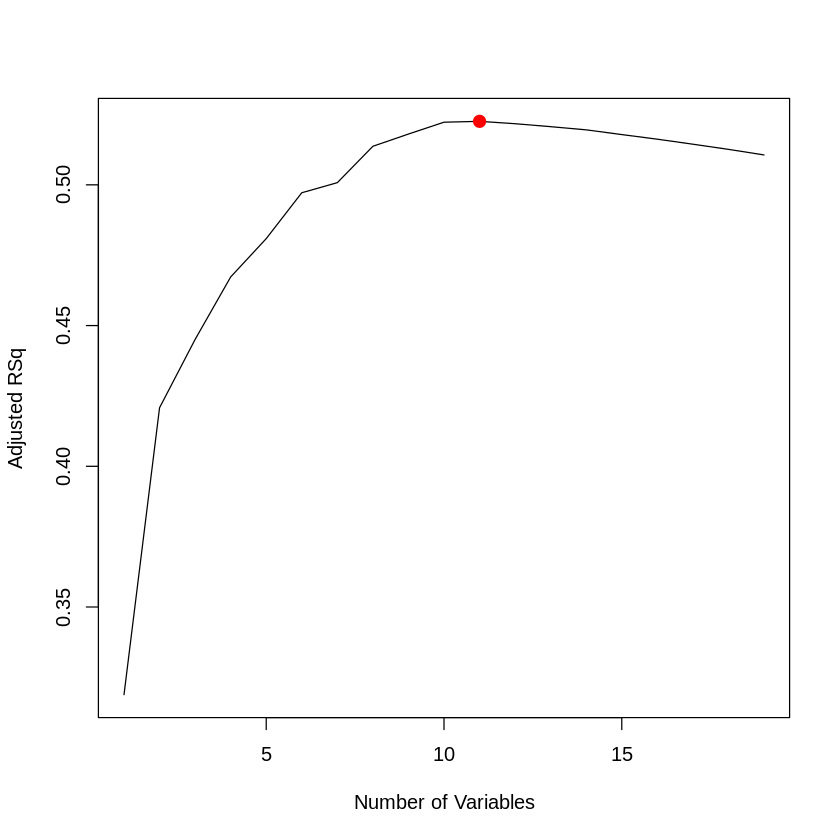

In [ ]:
plot(reg.summary$adjr2, xlab = "Number of Variables",
     ylab = "Adjusted RSq", type = "l")
points(11, reg.summary$adjr2[11], col = "red", cex=2,
pch = 20)

In a simlar way, we can plot the $C_p$ and BIC statistics, and indicate the models with the smallest statistic using `which.min()`.

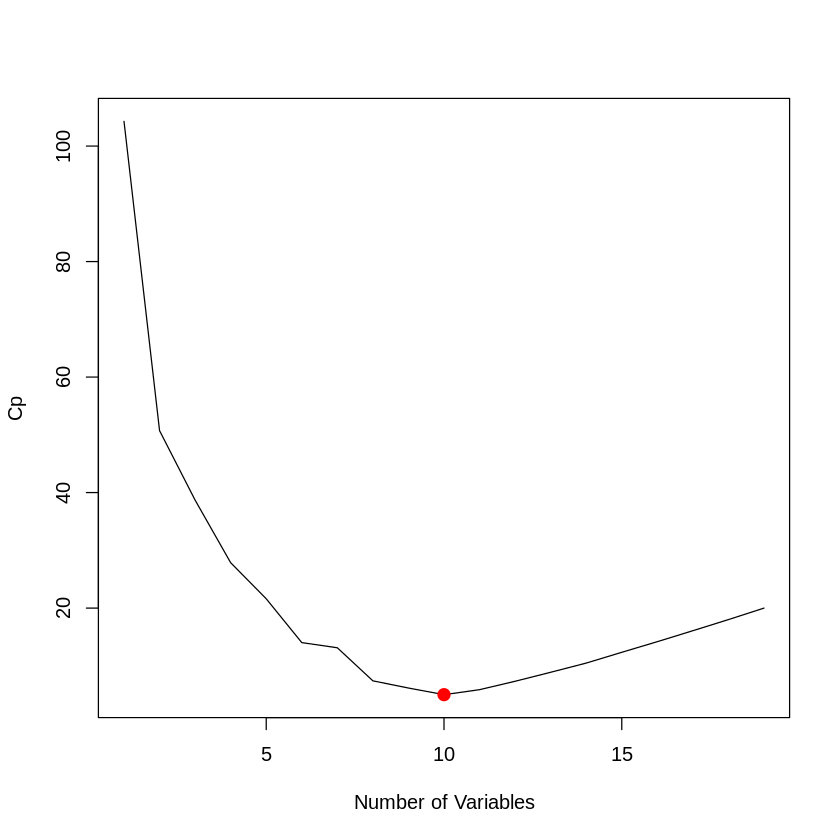

In [ ]:
plot(reg.summary$cp, xlab = "Number of Variables",
     ylab = "Cp", type = "l")
c_p <- which.min(reg.summary$cp)
points(c_p, reg.summary$cp[c_p], col = "red", cex=2,
pch = 20)

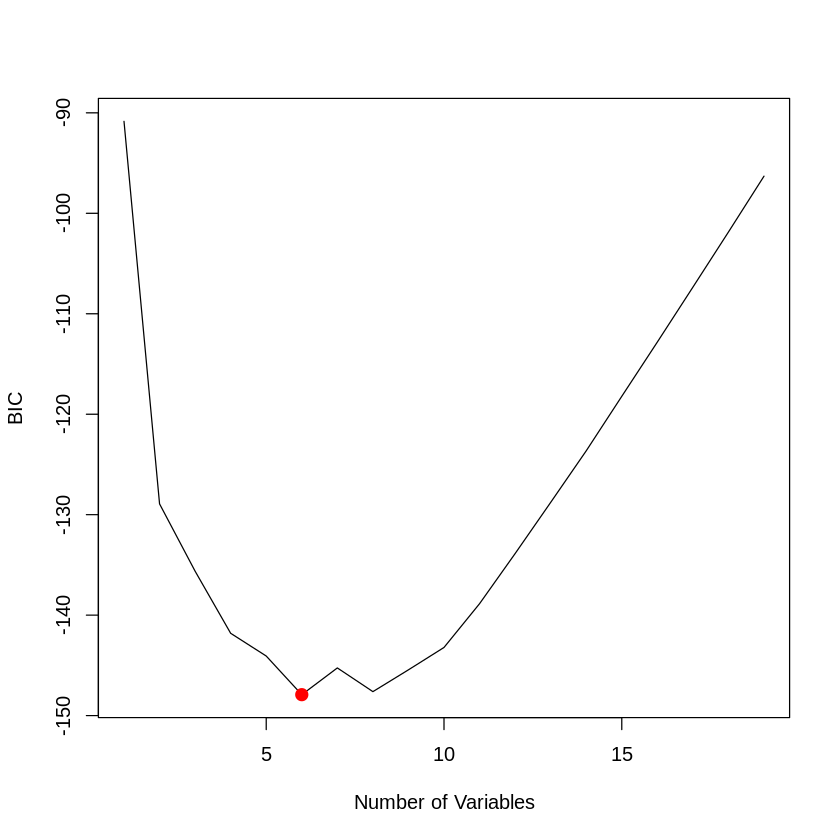

In [ ]:
plot(reg.summary$bic, xlab = "Number of Variables",
     ylab = "BIC", type = "l")
BIC <- which.min(reg.summary$bic)
points(BIC, reg.summary$bic[BIC], col = "red", cex=2,
pch = 20)

The `regsubsets()` function has a built-in `plot()` command which can be used to display the selected variables for the best model with a given number of predictors, ranked according to the BIC, $C_p$, adjusted $R^2$, or AIC.

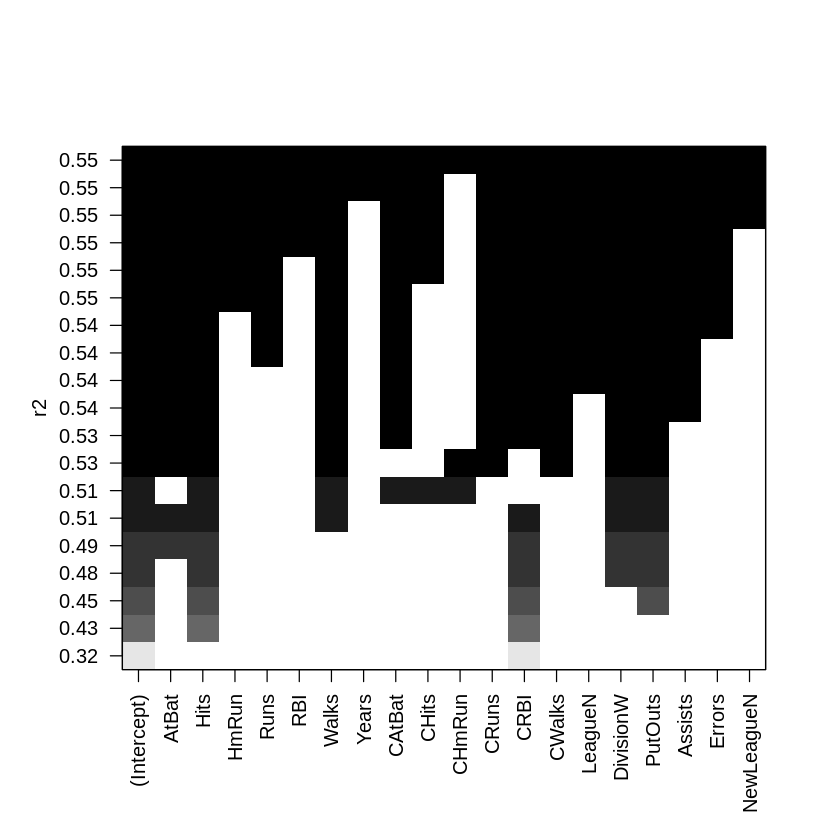

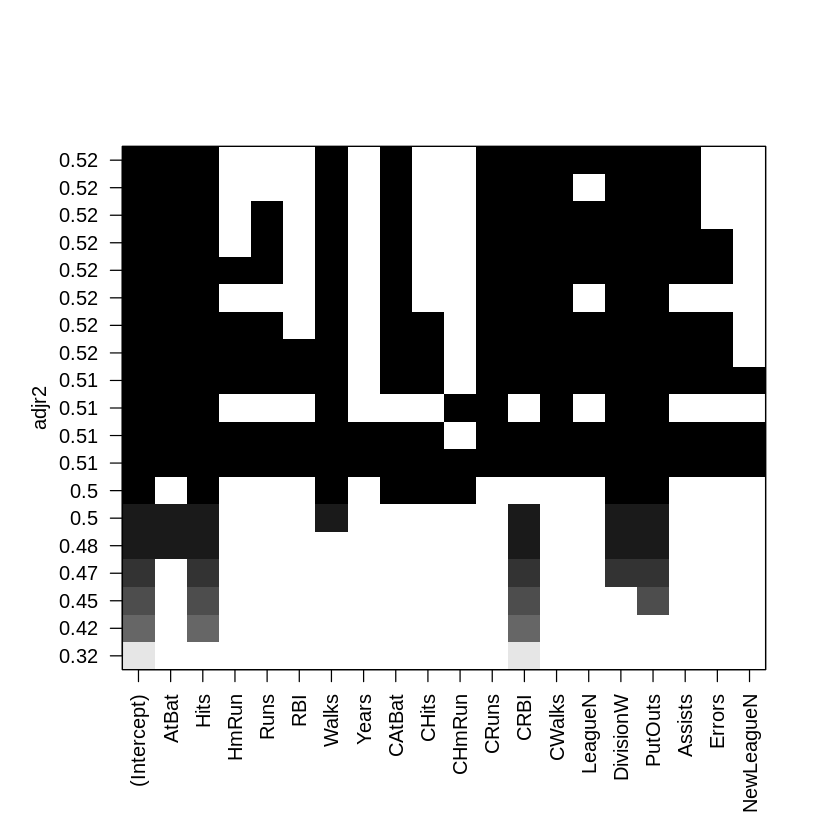

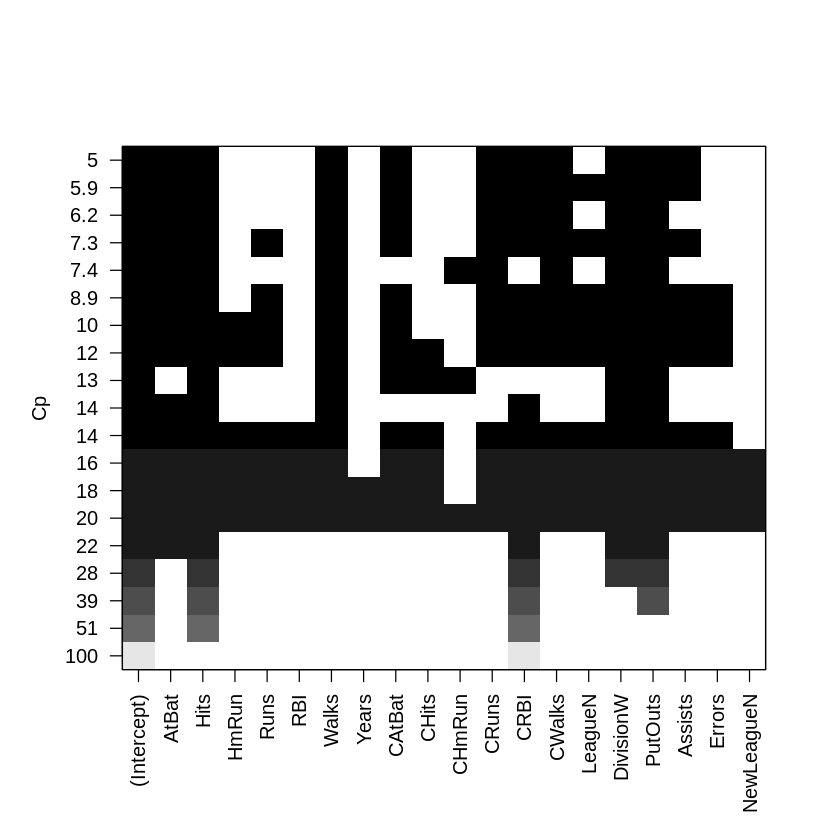

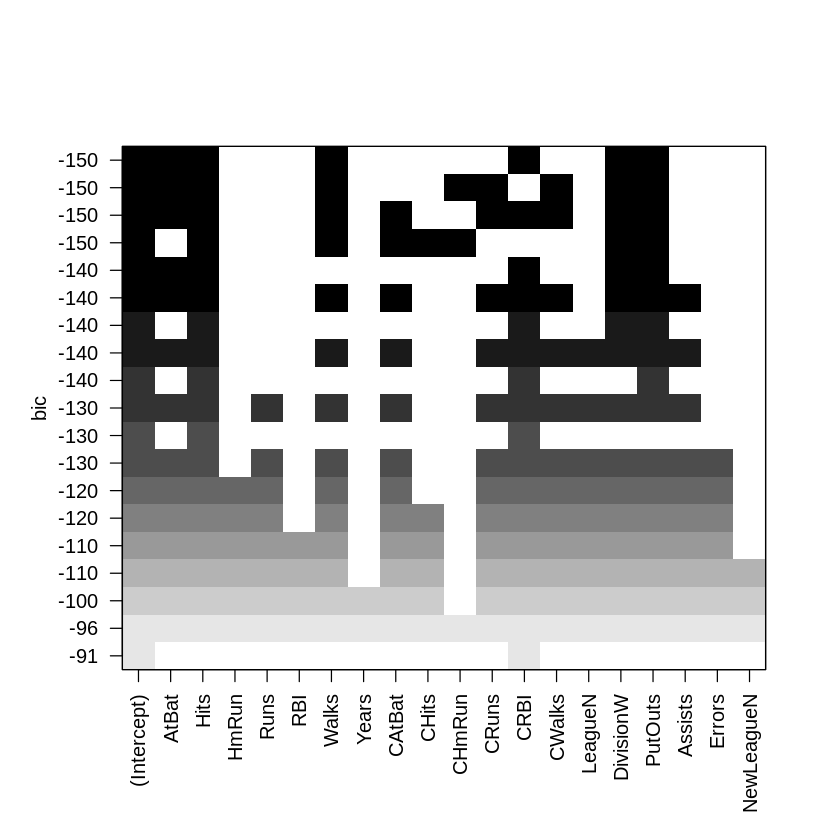

In [ ]:
plot(regfit.full, scale = "r2")
plot(regfit.full, scale = "adjr2")
plot(regfit.full, scale = "Cp")
plot(regfit.full, scale = "bic")

The top row of each plot contains a black square for each variable selected according to the optimal model associated with that statistic. For instance, we see that several models share a BIC close to -150. However, the model with the lowest BIC is the six-variable model that contains only `AtBat`, `Hits`, `Walks`, `CRBI`, `DivisionW`, and `PutOuts`. We can use the `coef()` function to see the coefficient estimates associated with this model.

In [ ]:
print(coef(regfit.full, 6))

 (Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076 


#####***Forward and Backward Stepwise Selection***

We can also use the `regsubsets()` function to perform stepwise or backward stepwise selection, using the argument `method = "forward"` or `method = "backward"`.

In [ ]:
regfit.fwd <- regsubsets(Salary ~ ., data = Hitters,
                         nvmax = 19, method = "forward")
print(summary(regfit.fwd))

regfit.bwd <- regsubsets(Salary ~ ., data = Hitters,
                         nvmax = 19, method = "backward")
print(summary(regfit.bwd))

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

For instance, we see that using forward stepwise selection the best one-variable model contains only `CRBI`, and the best two-variable model additionally includes `Hits`. For this data, the best one-variable through six-variable models are each identical for best subset and forward selection. However, the best seven-variable models identified by forward stepwise selection, backward stepwise selection, and best subset selection are all different.

In [ ]:
print(coef(regfit.full, 7))
print(coef(regfit.fwd, 7))

print(coef(regfit.bwd, 7))

 (Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813 
 (Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404 
 (Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847 


#####***Choosing Among Models Using the Validation-Set Approach and Cross-Validation***

We just saw that it is possible to choose among a set of models of different sizes using $C_p$, $BIC$, and adjusted $R^2$. We will now consider how to do this using the validation set and cross-validation approaches.

In order for these approaches to yield accurate estimates of the best error, we must use *only the training observations* to perform all aspects of model-fitting — including variable selection. Therefore, the determination of which model of a given size is best must be made using *only the training observations* in each training fold. This point is subtle but important. If the full data set is used to select the best subset at each step, then the validation set errors and cross-validation errors that we obtain will not be accurate estimates of the test error.

In order to use the validation set approach, we begin by splitting the observations into a training set and a test set. We do this by creating a random vector, `train`, of elements equal to `TRUE` if the corresponding observation is in training set, and `FALSE` otherwise. The vector `test` has a `TRUE` if the observation is in th test set, and a `FALSE` otherwise. Note the `!` in the command to create `test` causes `TRUE`s to be switched to `FALSE`s and vice versa. We also set a random seed so that the user will obtain the same training set/test set split.  

In [ ]:
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(Hitters), replace = TRUE)
test <- (!train)

In [ ]:
print(train)

  [1]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
 [37] FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [49]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
 [61]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [73]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
 [85]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [97]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[121] FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[133] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE
[145]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRU

Now, we apply `regsubsets()` to the training set in order to perform best subset selection.

In [ ]:
regfit.best <- regsubsets(Salary ~ ., data = Hitters[train, ], nvmax = 19)

Notice that we subset the `Hitters` data frame directly in the call in order to access only the training subset of the data, using the expression `Hitters[train, ]`. We now compute the validation set error for the best model of each model size. We first make a model matrix from the test data.

In [ ]:
test.mat <- model.matrix(Salary ~ ., data = Hitters[test, ])

The `model.matrix()` function is used in many regression packages for building an "X" matrix from data. Now we run a loop, and for each size `i`, we extract the coefficients from `regfit.best` for the best model of that size, multiply them into the appropiate columns of the test model matrix to form the predicitons, and compute the test MSE.

In [ ]:
val.errors <- rep(NA, 19)
for (i in 1:19){
  coefi <- coef(regfit.best, id = i)
  pred <- test.mat[, names(coefi)] %*% coefi
  val.errors[i] <- mean((Hitters$Salary[test] - pred)^2)
}

We find that the best models is the one that contains seven variables.

In [ ]:
print(val.errors)

 [1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2


In [ ]:
print(which.min(val.errors))

[1] 7


In [ ]:
print(coef(regfit.best, 7))

 (Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925 


This was a little tedious, partly because there is no `predict()` method for `regsubsets()`. Since we will be using this function again, we can capture our steps above and write our own predict method.

In [ ]:
predict.regsubsets <- function(object, newdata, id, ...){
  form <- as.formula(object$call[[2]])
  mat <- model.matrix(form, newdata)
  coefi <- coef(object, id = id)
  xvars <- names(coefi)
  mat[, xvars] %*% coefi
}

Our function pretty much mimics what we did above. The only complex part is how we extracted the formula used in the call to `regsubsets()`. We demontrate how we use this function below, when we do cross-validation.

Finally, we perform best subset selection on the full data set, and select the best seven-variable model. It is important that we make use of the full data set in order to obtain more accurate coefficient estimates. Note that we perform best subset selection on the full data set and select the best seven-variable model, rather than simply using the variables that were obtained from the trianing set, because the best seven-variable model on the full data set may differ from the corresponding model on the trianing set.

In [ ]:
regfit.best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
print(coef(regfit.best, 7))

 (Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813 


In fact, we see that the best seven-variable model on the full data set has a different set of variables than the best seve-variables model on the trianing set.

We now try to choose among the models of different sizes using cross-validation. This approach is somewhat involved, as we must perform best subset selection *within each of the k training sets*. Despite this, we see that with its clever subsetting syntax, `R` mkes this job quite easy. First, we create a vector that allocates each observtion to one of $k = 10$ folds, and we create a matrix in which we will store the results.

In [ ]:
k <- 10
n <- nrow(Hitters)
set.seed(1)
folds <- sample(rep(1:k, length = n))
cv.errors <- matrix(NA, k, 19, dimnames = list(NULL, paste(1:19)))

Now we write a for loop that performs cross-validation. In the *j*th fold, the elements of `folds` that equal `j` are in the test set, and the remainder are in the training set. We make our predictions for each model size (using our new `predict()` method), compute the test errors on the appropiate subset, and store them in the approapiate slot in the matrix `cv.errors`. Note that in the following code `R` will automatically use our `predict.regsubsets()` function when we call `predict()` because the `best.fit` object has class `regsubsets`.   

In [ ]:
for (j in 1:k){
  best.fit <- regsubsets(Salary ~ ., data = Hitters[folds != j, ],
                       nvmax = 19)
  for (i in 1:19){
    pred <- predict(best.fit, Hitters[folds == j, ], id = i)
    cv.errors[j, i] <- mean((Hitters$Salary[folds == j] - pred)^2)
  }
}

This has given us a $10*19$ matrix, of which the $(j, i)$th element corresponds to the test MSE for the $j$th cross-validation fold for the best $i$-variable model. We use the `apply()` function to average over the columns of this matrix in order to obtain a vector for which the $i$th element is the cross-validation error for the $i$-variable model.  

In [ ]:
mean.cv.errors <- apply(cv.errors, 2, mean)
print(mean.cv.errors)

       1        2        3        4        5        6        7        8 
143439.8 126817.0 134214.2 131782.9 130765.6 120382.9 121443.1 114363.7 
       9       10       11       12       13       14       15       16 
115163.1 109366.0 112738.5 113616.5 115557.6 115853.3 115630.6 116050.0 
      17       18       19 
116117.0 116419.3 116299.1 


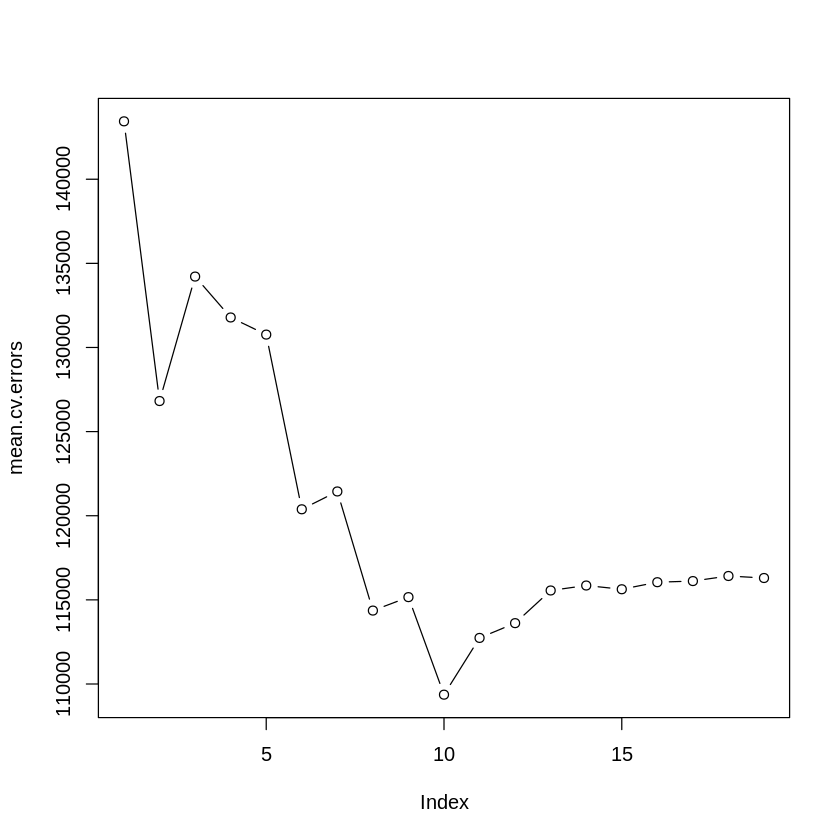

In [ ]:
par(mfrow = c(1, 1))
plot(mean.cv.errors, type = "b")

We see that cross-validation selects a 10-variable model. We now perform best subset selection on the full data set in order to obtain the 10-variable model.

In [ ]:
reg.best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
print(coef(reg.best, 10))

 (Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680 


####**6.5.2 Ridge Regression and the Lasso**

We will use the `glmnet` package n order to perform ridge regression and the lasso. The main function in this package is `glmnet()`, which can be used to fit ridge regression models, lasso models, and more. This function has slightly different syntax from other model-fitting functions that we have encountered thus far in this book. In particular, we must pass in an `x` matrix as well as a `y` vector, and we do not use the `y ~ x` syntax. We will now perform ridge regression and the lasso in order to predict `Salary` on the `Hitters` data. Before proceedinf ensure that the missing values have been removed from the data, as described in Section 6.5.1.

In [ ]:
print(sum(is.na(Hitters$Salary)))

[1] 0


In [ ]:
print(str(Hitters))

'data.frame':	263 obs. of  20 variables:
 $ AtBat    : int  315 479 496 321 594 185 298 323 401 574 ...
 $ Hits     : int  81 130 141 87 169 37 73 81 92 159 ...
 $ HmRun    : int  7 18 20 10 4 1 0 6 17 21 ...
 $ Runs     : int  24 66 65 39 74 23 24 26 49 107 ...
 $ RBI      : int  38 72 78 42 51 8 24 32 66 75 ...
 $ Walks    : int  39 76 37 30 35 21 7 8 65 59 ...
 $ Years    : int  14 3 11 2 11 2 3 2 13 10 ...
 $ CAtBat   : int  3449 1624 5628 396 4408 214 509 341 5206 4631 ...
 $ CHits    : int  835 457 1575 101 1133 42 108 86 1332 1300 ...
 $ CHmRun   : int  69 63 225 12 19 1 0 6 253 90 ...
 $ CRuns    : int  321 224 828 48 501 30 41 32 784 702 ...
 $ CRBI     : int  414 266 838 46 336 9 37 34 890 504 ...
 $ CWalks   : int  375 263 354 33 194 24 12 8 866 488 ...
 $ League   : Factor w/ 2 levels "A","N": 2 1 2 2 1 2 1 2 1 1 ...
 $ Division : Factor w/ 2 levels "E","W": 2 2 1 1 2 1 2 2 1 1 ...
 $ PutOuts  : int  632 880 200 805 282 76 121 143 0 238 ...
 $ Assists  : int  43 82 11 40 42

In [ ]:
x <- model.matrix(Salary ~ ., Hitters)[, -1]
y <- Hitters$Salary

The `model.matrix()` function is particularly useful for creating `x`; **not only does it produce a matrix corresponding to the 19 predictors but it also automatically transforms any qualitative variables into dummy variables**. The latter property is important because `glmnet()` can only take numerical, quantitative inputs.  

#####***Ridge Regression***

The `glmnet()` function has an `alpha` argument that determines what type of model is fit. If `alpha = 0` then a ridge regression model is fit, and if `alpha = 1` then a lasso model is fit. We first fit a ridge regresion model.

In [ ]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’




In [ ]:
library(glmnet)
grid <- 10^seq(10, -2, length = 100)
ridge.model <- glmnet(x, y, alpha = 0, lambda = grid)

Loading required package: Matrix

Loaded glmnet 4.1-10



By default the `glmnet()` function performs ridge regression for an automatically selected range of $\lambda$ values. However, here we have chosen to implement the function over a grid of values ranging from $\lambda = 10^{10}$ to $\lambda^{-2}$, essentially covering the full range of scenarios from the null model containing onle the intercept, to the lest squares fit. As we will see, we can also compute model fits for a particulr value of $\lambda$ that is not one of the original `grid` values. Note that by default, the `glmnet()` function standardizes the variables so that they are on the same scale. To turn off this default setting, use the argument `standardize = FALSE`.

Associated with each value of $\lambda$ is a vector of ridge regression coefficients, stored in a matrix that can be accessed be `coef()`. In this case, it is a $20 * 100$ matrix with 20 rows (one for each predictor, plus an intercept) and 100 columns (one for each value of $\lambda$).

In [ ]:
print(dim(coef(ridge.model)))

[1]  20 100


We expect the coefficient estimates to be much smaller, in terms of $l_2$ norm, when a large value of $\lambda$ is used, as compared to when a small value of $\lambda$ is used. These are the coefficients when $\lambda = 11,498$, along with their $l_2$ norm:

In [ ]:
print(ridge.model$lambda[50])

[1] 11497.57


In [ ]:
print(coef(ridge.model)[, 50])

  (Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531 


In [ ]:
print(sqrt(sum(coef(ridge.model)[-1, 50]^2)))

[1] 6.360612


In contrast, here are the coefficients when $\lambda = 705$, along with their $l_2$ norm. Note the much larger $l_2$ norm of the coeffieicnts associated with this smaller value of $\lambda$.

In [ ]:
print(ridge.model$lambda[60])

[1] 705.4802


In [ ]:
print(coef(ridge.model)[, 60])

 (Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213 


In [ ]:
print(sqrt(sum(coef(ridge.model)[-1, 60]^2)))

[1] 57.11001


We can use the `predict()` function for a number of purposes. For instance, we can obtain the ridge regressio coefficients for a new value of $\lambda$, say 50:

In [ ]:
print(predict(ridge.model, s = 50, type = "coefficients")[1:20, ])

  (Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00 


We now split the samples into training set and a test set in order to estimate the test error of ridge regression and the lasso. There are two common ways to randomly split a data set. The first is to produce a random vector of `TRUE`, `FALSE` elements and select the observations corresponding to `TRUE` for the trianing data. The second is to randomly choose a subset of numbers between 1 and $n$; these can then be used as indices for the training observations. The two approaches work equally well. We used the former method in Section 6.5.1. Here we demonstrate the latter approach.

We first set a random seed so that the results obtained will be reproductible.



In [ ]:
set.seed(1)
train <- sample(1:nrow(x), nrow(x)/2)
test <- (-train)
y.test <- y[test]

Next we fit a ridge regression model on the training set, and evaluate its MSE on th test set, using $\lambda = 4$. Note the use of the `predict()` function again. This time we get predictions for a test set, by replacing `type = "coefficients"` with `newx` argument.

In [ ]:
ridge.model <- glmnet(x[train, ], y[train],
                      alpha = 0, lambda = grid, thresh = 1e-12)
ridge.pred <- predict(ridge.model, s = 4, newx = x[test, ])
print(mean((ridge.pred - y.test)^2))

[1] 142199.2


The test MSE is 142,199. Note that if we had instead simply fit a model with just an intercept, we would have predicted each test observation using the mean of the training observations. In that case, we could compute the test set MSE like this:

In [ ]:
print(mean((mean(y[train]) - y.test)^2))

[1] 224669.9


We could also get the same result by fitting a ridge regression model with a *very* large value of $\lambda$.

In [ ]:
ridge.pred <- predict(ridge.model, s = 1e10, newx = x[test, ])
print(mean((ridge.pred - y.test)^2))

[1] 224669.8


So fitting a ridge regression model with $\lambda = 4$ leads to a much lower test MSE than fitting a model with just an intercept. We now check whether there is any benefit to performing ridge regression with $\lambda = 4$ instead of just performing least squares regression. Recall that least squares is simply ridge regression with $\lambda = 0$.

In [ ]:
ridge.pred <- predict(ridge.model, s = 0, newx = x[test, ],
                      exact = T, x = x[train, ], y = y[train])
print(mean((ridge.pred - y.test)^2))

[1] 168588.6


In [ ]:
lm(y ~ x, subset = train)
print(predict(ridge.model, s = 0, exact = T, type = "coefficients",
        x = x[train, ], y = y[train])[1:20, ])


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
   274.0145      -0.3521      -1.6377       5.8145       1.5424       1.1243  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
     3.7287     -16.3773      -0.6412       3.1632       3.4008      -0.9739  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    -0.6005       0.3379     119.1486    -144.0831       0.1976       0.6804  
    xErrors  xNewLeagueN  
    -4.7128     -71.0951  


 (Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 274.0200994   -0.3521900   -1.6371383    5.8146692    1.5423361    1.1241837 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   3.7288406  -16.3795195   -0.6411235    3.1629444    3.4005281   -0.9739405 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  -0.6003976    0.3378422  119.1434637 -144.0853061    0.1976300    0.6804200 
      Errors   NewLeagueN 
  -4.7127879  -71.0898914 


In general, if we want to fit a (unpenalized) least squares model, then we should use the `lm()` function, since that function provides more useful outputs, such as standard errors and p-values for the coefficients.

**In general, instead of arbitrarily choosing $\lambda = 4$, it would be better to use cross-validation to chose the tunning parameter $\lambda$**. We can do this using the built-in cross-validation function, `cv.glmnet()`. By default, the function performs ten-fold cross-validation, though this can be changed using the argument `nfolds`. Note that we set a random seed first so our results will be reproductible, since the choice of the cross-validation folds is random.   

[1] 326.0828


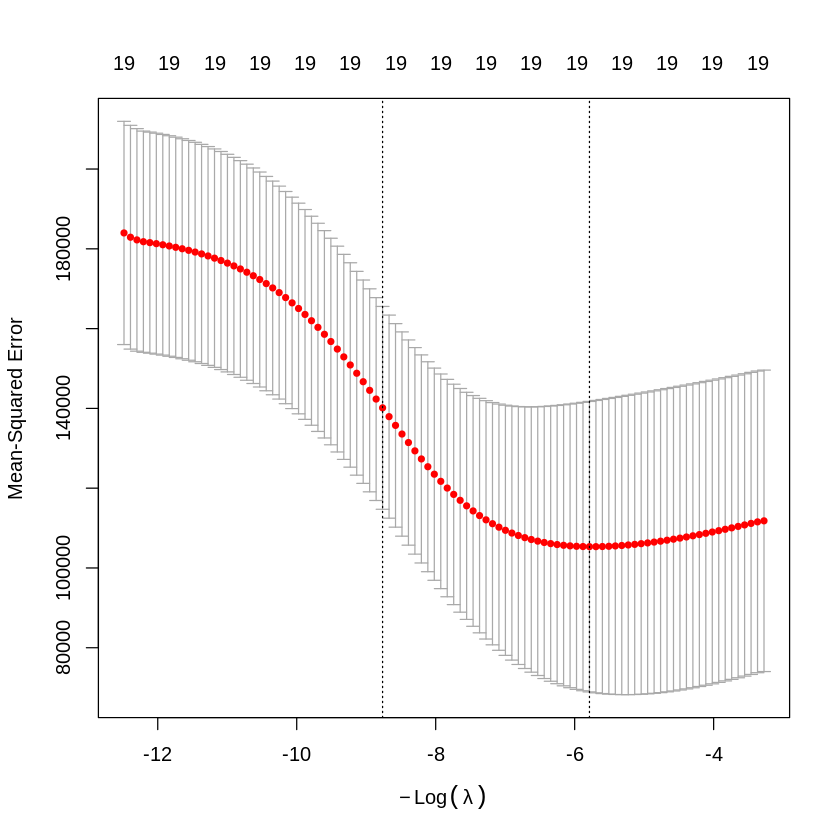

In [ ]:
set.seed(1)
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0)
plot(cv.out)
bestlam <- cv.out$lambda.min
print(bestlam)

Therefore, we see that the value of $\lambda$ that results in the smallest cross-validation error is 326. What is the test MSE associated with this value of $\lambda$?

In [ ]:
ridge.pred <- predict(ridge.model, s = bestlam, newx = x[test, ])
print(mean((ridge.pred - y.test)^2))

[1] 139856.6


This represents a further improvement over the test MSE that we got using $\lambda = 4$. Finally, we refit our ridge regression model on the full data set, using the value of $\lambda$ chosen by cross-validation, and examine the coefficient estimates.

In [ ]:
out <- glmnet(x, y, alpha = 0)
print(predict(out, type = "coefficients", s = bestlam)[1:20, ])

 (Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 15.44383120   0.07715547   0.85911582   0.60103106   1.06369007   0.87936105 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.62444617   1.35254778   0.01134999   0.05746654   0.40680157   0.11456224 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.12116504   0.05299202  22.09143197 -79.04032656   0.16619903   0.02941950 
      Errors   NewLeagueN 
 -1.36092945   9.12487765 


As expected, none of the coefficients are zero—**ridge regression does not perform variable selection!**

#####***The Lasso***

We now ask whether the lasso can yield either to a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we once again use the `glmnet()` function; however, this time we use the argument `alpha = 1`. We proceed just as we did in fitting a ridge model.

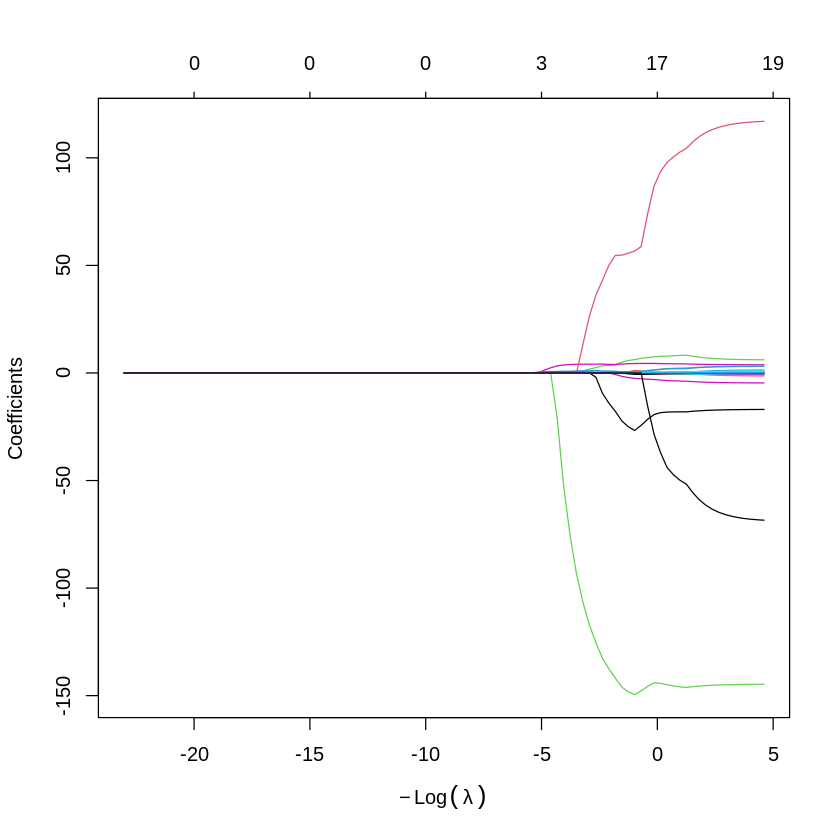

In [ ]:
lasso.model <- glmnet(x[train, ], y[train], alpha = 1, lambda = grid)
plot(lasso.model)

We can see from the coefficient plot that depending on the choice of tunning parameter, some of the coefficients will be exactly equal to zero. We now perform cross-validation and compute the associated test error.

[1] 143673.6


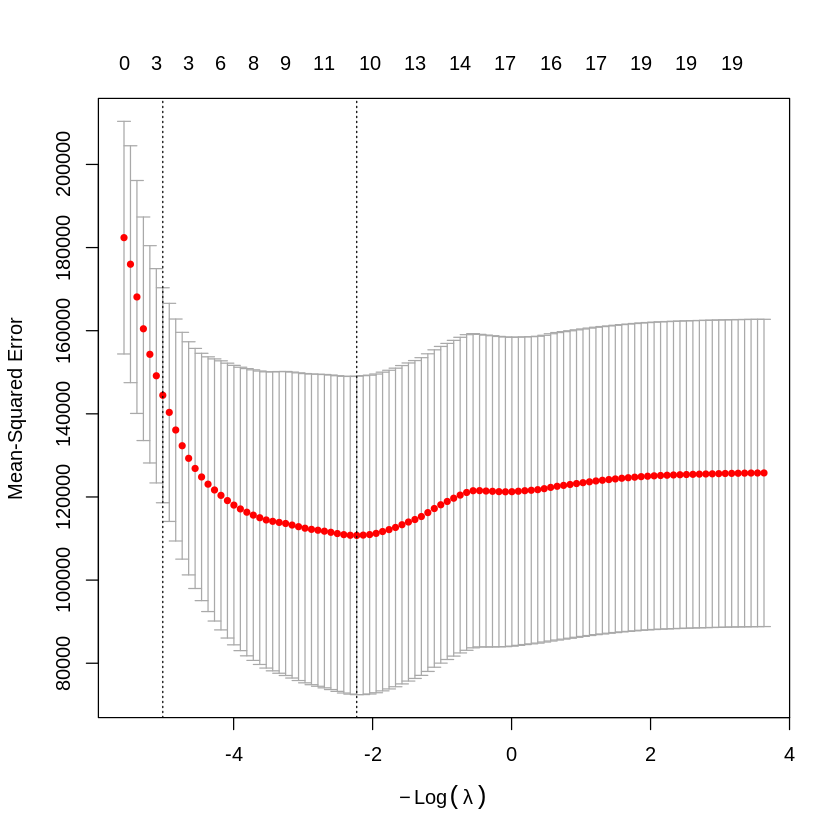

In [ ]:
set.seed(1)
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 1)
plot(cv.out)
bestlambda <- cv.out$lambda.min
lasso.pred <- predict(lasso.model, s = bestlambda, newx = x[test, ])
print(mean((lasso.pred - y.test)^2))

This is substantially lower than the test set MSE of the null model and of least squares, and very similar to the test MSE of ridge regression with $\lambda$ chosen by cross-validation.

**However, the lasso has a substaintail advantage over ridge regression in that the resulting coefficient estimates are sparse. Here we see that 8 of the 19 coefficient estimates are exactly zero. So the lasso model with $\lambda$ chosen by cross-validation contains only eleven variables.**

In [ ]:
out <- glmnet(x, y, alpha = 1, lambda = grid)
lasso.coeff <- predict(out, type = "coefficients", s = bestlambda)[1:20, ]
print(lasso.coeff)

  (Intercept)         AtBat          Hits         HmRun          Runs 
   1.27479059   -0.05497143    2.18034583    0.00000000    0.00000000 
          RBI         Walks         Years        CAtBat         CHits 
   0.00000000    2.29192406   -0.33806109    0.00000000    0.00000000 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.02825013    0.21628385    0.41712537    0.00000000   20.28615023 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-116.16755870    0.23752385    0.00000000   -0.85629148    0.00000000 


In [ ]:
print(lasso.coeff[lasso.coeff != 0])

  (Intercept)         AtBat          Hits         Walks         Years 
   1.27479059   -0.05497143    2.18034583    2.29192406   -0.33806109 
       CHmRun         CRuns          CRBI       LeagueN     DivisionW 
   0.02825013    0.21628385    0.41712537   20.28615023 -116.16755870 
      PutOuts        Errors 
   0.23752385   -0.85629148 


####**6.5.3 PCR and PLS Regression**

#####***Principal Components Regression (PCR)***

Principal components regression (PCR) can be performed using the `pcr()` function, which is part of the `pls` library. We now apply PCR to the `Hitters` data, in order to predict `Salary`.

In [ ]:
install.packages("pls")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(pls)
set.seed(2)
pcr.fit <- pcr(Salary ~ ., data = Hitters, scale = TRUE, validation = "CV")


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




The syntax for the `pcr()` function is similar to that for `lm()`, with a few additional options. Setting `scale = TRUE` has the effect of *standardizing* each predictor, using $\hat{x_{ij}} = \frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i = 1}^n{(x_{ij} - \bar{x_j})^2}}}$, prior to generating the principal components, so that th scale on which each variable is measured will not have an effect. Setting `validation = "CV"` causes `pcr()` to compute the ten-fold cross-validation error for each possible value of $M$, the number of principal components used. The resulting fit can be examined using `summary()`.

In [ ]:
print(summary(pcr.fit))

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    351.9    353.2    355.0    352.8    348.4    343.6
adjCV          452    351.6    352.7    354.4    352.1    347.6    342.7
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       345.5    347.7    349.6     351.4     352.1     353.5     358.2
adjCV    344.7    346.7    348.5     350.1     350.7     352.0     356.5
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        349.7     349.4     339.9     341.6     339.2     339.6
adjCV     348.0     347.7     338.2     339.7     337.2     337.6

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

The CV score is provided for each possible number of components, raging from $M = 0$ onwards. Note that `pcr()` reports the *root mean squared error*; in order to obtain the usual MSE, we must square this quantity. For instance, a root mean squared error of $352.8$ corresponds to an MSE of $352.8^2 = 124,468$.

One can also plot the cross-validation scores using the `validationplot()` function. Using `val.type = "MSEP"` will cause the cross-validation MSE to be plotted.

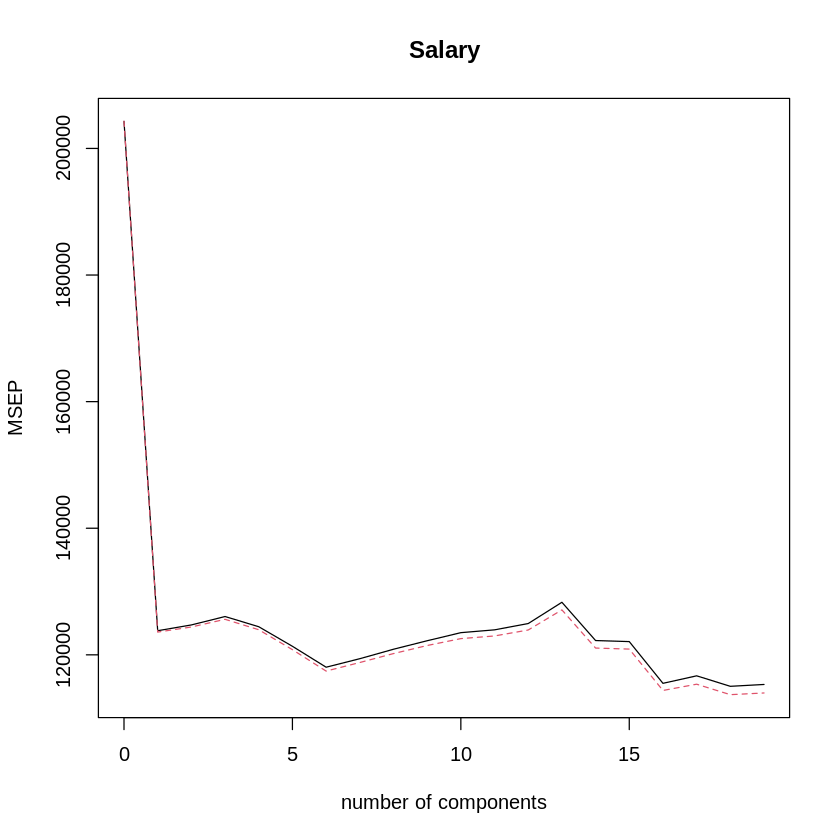

In [ ]:
validationplot(pcr.fit, val.type = "MSEP")

We see that the smallest cross-validation error occurs when $M = 18$ components are used. Thisis barely fewer than $M = 19$, which amounts to simply performing least squares, *because when all of the components are used in PCR no dimension reduction occurs*. However, from the plot we also see that the cross-validation error is roughly the same when only one componet is included in the model. **This suggests that the model that uses just a small number of components might suffice**.

The `summary()` function also provides the *percentage of variance explained* in the predictors and in the response using different number of components. This concept is discussed in greater detail in Chapter 12. **Briefly, we can think of this as the amount of information about the predictor or the response that is captured using $M$ principal components**. For example, setting $M = 1$ only captures $38.31%$ of all the variance, or information, in the predictors. In contrst, using $M = 5$ increases the value to $84.29%$. If we were to use all $M = p = 19$ components, this would increase to $100%$.

We now perform PCR on the training data and evaluate its test set performance.

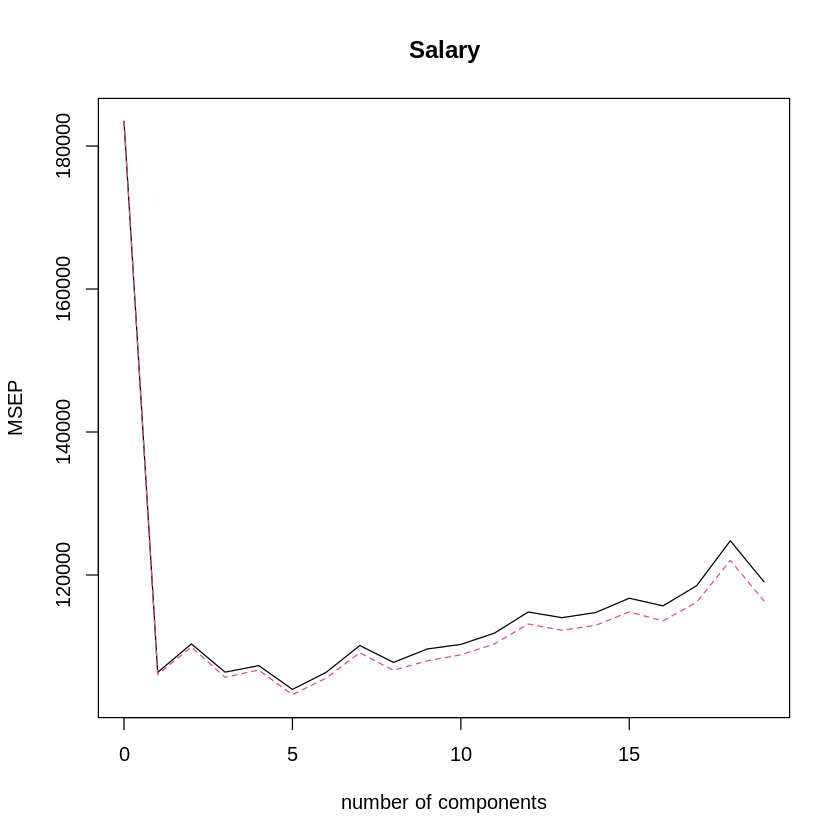

In [ ]:
set.seed(1)
pcr.fit_train <- pcr(Salary ~ ., data = Hitters, subset = train,
               scale = TRUE, validation = "CV")
validationplot(pcr.fit_train, val.type = "MSEP")

Now we found that the lowest cross-validation error occurs when $M = 5$ components are used. We compute the test MSE as follows.

In [ ]:
validationplot(pcr.fit, val.type = "MSEP")
pcr.pred <- predict(pcr.fit_train, x[test, ], ncomp = 5)
print(mean((pcr.pred - y.test)^2))

[1] 142811.8


This test set MSE is competitive with the results obtained using ridge regression and the lasso. **However, as a result ofthe way PCR is implemented, the final model is more difficult to interpret because it does not perform ay kind of variable selection or even directly produce coefficient estimates**.

Finally, we fit PCR on the full data set, using $M = 5$, the number of components identified by cros-validation.

In [ ]:
pcr.fit_full <- pcr(y ~ x, scale = TRUE, ncomp = 5)
print(summary(pcr.fit_full))

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps
X    38.31    60.16    70.84    79.03    84.29
y    40.63    41.58    42.17    43.22    44.90
NULL


#####***Partial Least Squares***

We implement partial least squares (PLS) using the `plsr()` function, also in the `pls` library. The sytax is just like that of the `pcr()` function.

In [ ]:
set.seed(1)
pls.fit <- plsr(Salary ~ ., data = Hitters, subset = train,
                scale = TRUE, validation = "CV")
print(summary(pls.fit))

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           428.3    325.5    329.9    328.8    339.0    338.9    340.1
adjCV        428.3    325.0    328.2    327.2    336.6    336.1    336.6
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       339.0    347.1    346.4     343.4     341.5     345.4     356.4
adjCV    336.2    343.4    342.8     340.2     338.3     341.8     351.1
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        348.4     349.1     350.0     344.2     344.5     345.0
adjCV     344.2     345.0     345.9     340.4     340.6     341.1

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         39.13    48.80    60.09    75.07    78.58    81.12    88.21    90.71
Salary 

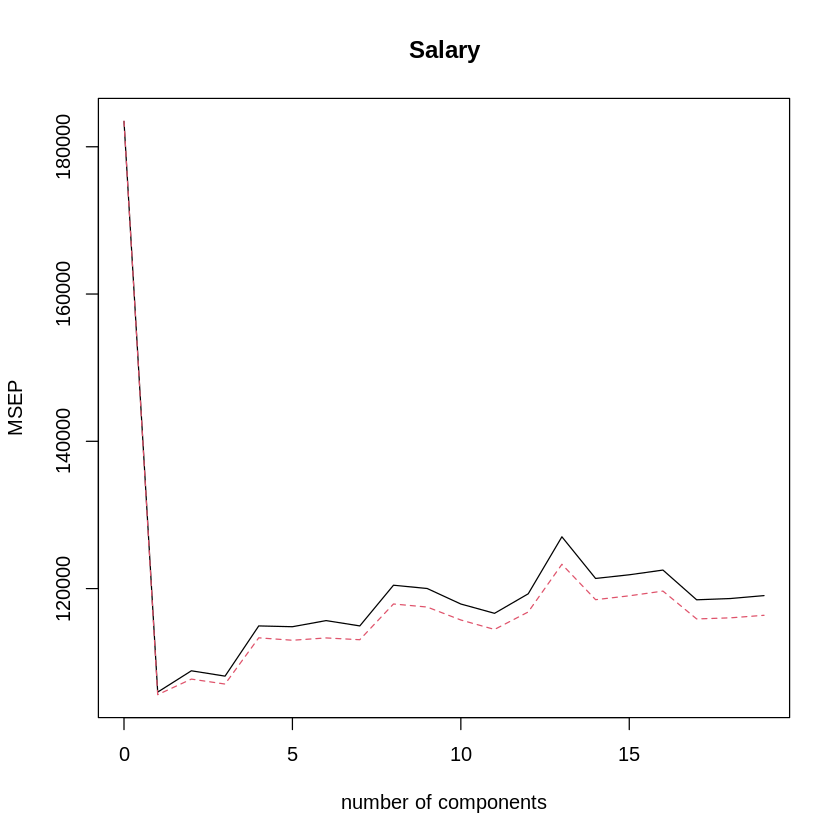

In [ ]:
validationplot(pls.fit, val.type = "MSEP")

The lowest cross-validation error occurs when only $M = 1$ partial least square directions are used. We now evaluat the crresponding test set MSE.

In [ ]:
pls.pred <- predict(pls.fit, x[test, ], ncomp = 1)
print(mean((pls.pred - y.test)^2))

[1] 151995.3


The test MSE is comparable to, but slightly higher than, the test MSE obtained using ridge regression, the lasso, and PCR.

Finally, we perform PLS using the full data set, using $M = 1$, the number of components identified by cross-validation.

In [ ]:
pls.fit_full <- plsr(Salary ~ ., data = Hitters, scale = TRUE, ncomp = 1)
print(summary(pls.fit_full))

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 1
TRAINING: % variance explained
        1 comps
X         38.08
Salary    43.05
NULL


Notice that the percentage of variance in `Salary` that one-component PLS fit explaines, $43.05$%, is almost as much as that explained using the final five-component model PCR fit, $44.90$%. **This is because PCR only attempts to maximize the amount of variance explained in the predictors, while PLS searches for directions that explain variance in both the predictors and the response**.   

###**6.6 Exercises**
---

####***Applied***

1. In this exercise, we will generate simulated data, and wil then use this data to perform best subset selection.

  (a) Use the `rnorm()` function to generate a predictor $X$ of length $n = 100$, as well as a noise vector $\epsilon$ of length $n = 100$.

In [ ]:
# Set seed for reproductibility
set.seed(1)
# Number of points
n <- 100
# Simulate a true underlying relationship or summetric data
noise_sd = 1
X <- rnorm(n = n, mean = 0, sd = noise_sd)

In [ ]:
print(X)

  [1] -0.626453811  0.183643324 -0.835628612  1.595280802  0.329507772
  [6] -0.820468384  0.487429052  0.738324705  0.575781352 -0.305388387
 [11]  1.511781168  0.389843236 -0.621240581 -2.214699887  1.124930918
 [16] -0.044933609 -0.016190263  0.943836211  0.821221195  0.593901321
 [21]  0.918977372  0.782136301  0.074564983 -1.989351696  0.619825748
 [26] -0.056128740 -0.155795507 -1.470752384 -0.478150055  0.417941560
 [31]  1.358679552 -0.102787727  0.387671612 -0.053805041 -1.377059557
 [36] -0.414994563 -0.394289954 -0.059313397  1.100025372  0.763175748
 [41] -0.164523596 -0.253361680  0.696963375  0.556663199 -0.688755695
 [46] -0.707495157  0.364581962  0.768532925 -0.112346212  0.881107726
 [51]  0.398105880 -0.612026393  0.341119691 -1.129363096  1.433023702
 [56]  1.980399899 -0.367221476 -1.044134626  0.569719627 -0.135054604
 [61]  2.401617761 -0.039240003  0.689739362  0.028002159 -0.743273209
 [66]  0.188792300 -1.804958629  1.465554862  0.153253338  2.172611670
 [71] 

(b) Generate a response vector Y of length $n = 100$ according to the model

$$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$$

where $\beta_0, \beta_1, \beta_2$, and $\beta_3$ are constants of your choice.

In [ ]:
beta_0 <- pi
beta_1 <- exp(1)
beta_2 <- sqrt(2)
beta_3 <- (1 + sqrt(5))/2
epsilon <- rnorm(n = n, mean = 1, sd = 0.5)
Y <- beta_0 + beta_1*X + beta_2*X^2 + beta_3*X^3 + epsilon
print(Y)

  [1]   2.2686316   5.5821458   2.2718618  19.1011610   5.4408166   2.8107584
  [7]   5.6720722   7.3398889   7.2005748   3.0719218  16.9700583   5.3156859
 [13]   2.4507484 -12.6580682  11.5395882   3.9334937   3.8449681   9.9989784
 [19]   8.1164892   6.5039712   9.0396144   8.2632873   4.3160328  -8.4266832
 [25]   6.4142394   3.8310531   3.7763843  -2.2392891   3.2540416   4.8836295
 [31]  14.6570477   3.1071462   5.3517178   3.7350375  -1.4711132   3.1129868
 [37]   2.2332994   4.5732915  10.1643150   7.5272641   3.1674854   3.1419407
 [43]   8.3144786   6.3807892   1.7684229   1.5329979   5.6241103   7.7911687
 [49]   3.6927252   8.2767506   4.8062528   2.0991319   5.7976537   0.2340954
 [55]  15.0104531  28.5734713   3.4665147   0.8839546   6.9777254   4.2394966
 [61]  40.9300649   5.1400583   7.0927202   3.5066075   2.1658510   4.8198465
 [67]  -4.5180475  16.3090420   4.8257168  33.2775623   5.7608944   2.3282115
 [73]   7.0915981   2.5552741   0.2822729   5.6979600   2.457895

(c) Use the `regsubsets()` function to perform best subset selection in order to chose the best model containing the predictors $X, X^2, ..., X^{10}$. What is the best model obtained according to $C_p$, $BIC$, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.  

In [ ]:
df <- data.frame(X = X, y = Y)
# Create polynomial terms as separate columns in the data frame
for (i in 2:10) {
  df[paste0("X", i)] <- X^i
}
print(head(df))

           X         y         X2           X3          X4            X5
1 -0.6264538  2.268632 0.39244438 -0.245848275 0.154012589 -0.0964817733
2  0.1836433  5.582146 0.03372487  0.006193347 0.001137367  0.0002088698
3 -0.8356286  2.271862 0.69827518 -0.583498718 0.487588224 -0.4074426711
4  1.5952808 19.101161 2.54492084  4.059863355 6.476622070 10.3320308510
5  0.3295078  5.440817 0.10857537  0.035776429 0.011788611  0.0038844391
6 -0.8204684  2.810758 0.67316837 -0.552313364 0.453155653 -0.3717998868
            X6            X7           X8            X9          X10
1 6.044137e-02 -3.786373e-02 2.371988e-02 -1.485941e-02 9.308733e-03
2 3.835755e-05  7.044108e-06 1.293603e-06  2.375616e-07 4.362661e-08
3 3.404708e-01 -2.845071e-01 2.377423e-01 -1.986642e-01 1.660095e-01
4 1.648249e+01  2.629420e+01 4.194663e+01  6.691666e+01 1.067509e+02
5 1.279953e-03  4.217544e-04 1.389714e-04  4.579214e-05 1.508887e-05
6 3.050501e-01 -2.502839e-01 2.053500e-01 -1.684832e-01 1.382352e-01


In [ ]:
# Perform best subset selection using all polynomial terms as predictors
reg_full <- regsubsets(y ~ ., data = df, nvmax = 10)
print(summary(reg_full))

Subset selection object
Call: regsubsets.formula(y ~ ., data = df, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " " " " " " " " " "*"
5  ( 1 )  "*" "*" "*" " " "*" " " "*" " " " " " "
6  ( 1 )  "*" "*" "*" " " "*" "*" " " "*" " " " "
7  ( 1 )  "*" "*" " " " " "*" " " "*" "*" "*" "*"
8  ( 1 )  "*" "*" "*" " " "*" " " "*" "*" "*" "*"
9  ( 1 )  "*" "*" "*" " " "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"


In [ ]:
reg_full_summary <- summary(reg_full)

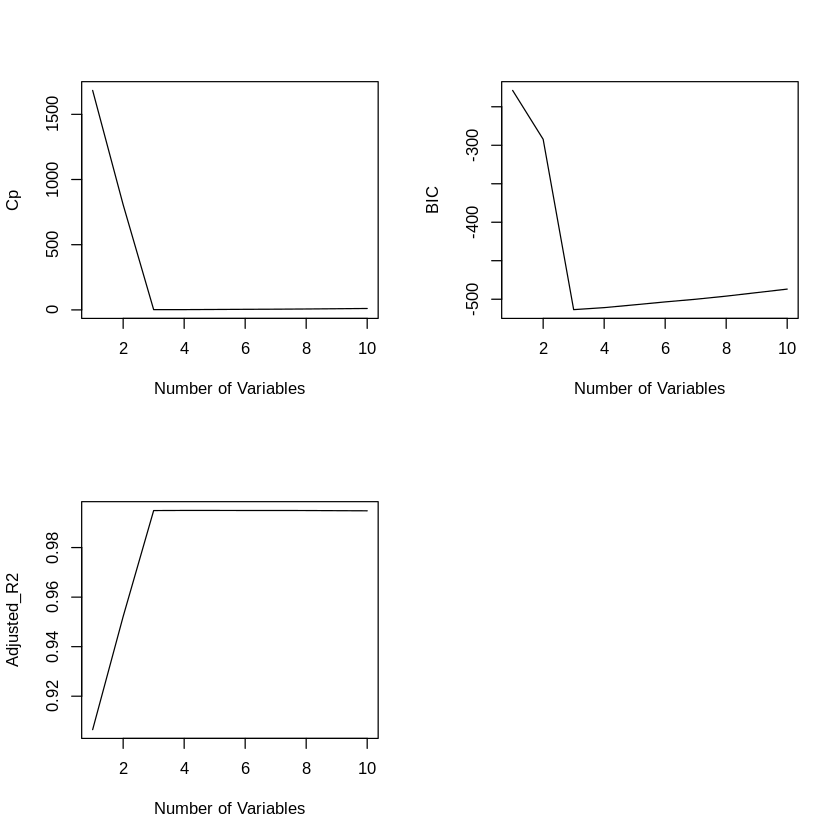

In [ ]:
par(mfrow = c(2, 2))
plot(reg_full_summary$cp, xlab = "Number of Variables",
     ylab = "Cp", type = "l")
plot(reg_full_summary$bic, xlab = "Number of Variables",
     ylab = "BIC", type = "l")
plot(reg_full_summary$adjr2, xlab = "Number of Variables",
     ylab = "Adjusted_R2", type = "l")

According to the plots displayed above, the best model corresponds to the 4-variable model based on $C_p$ and adjusted $R^2$--i.e., the one corresponding to $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4$.

In [ ]:
print(which.max(reg_full_summary$adjr2))
print(which.min(reg_full_summary$cp))
print(which.min(reg_full_summary$bic))

[1] 4
[1] 3
[1] 3


(d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

In [ ]:
reg_fwd <- regsubsets(Y ~ ., data = df,
                         nvmax = 10, method = "forward")
reg_bwd <- regsubsets(Y ~ ., data = df,
                         nvmax = 10, method = "backward")
reg_fwd_summary <- summary(reg_fwd)
reg_bwd_summary <- summary(reg_bwd)

print(reg_fwd_summary)
print(reg_bwd_summary)

Subset selection object
Call: regsubsets.formula(Y ~ ., data = df, nvmax = 10, method = "forward")
11 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
y       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X   y   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " "*" " " " " " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" " " " " " " " " " " " " " " "*" " "
4  ( 1 )  "*" "*" " " " " " " " " " " "*" " " "*" " "
5  ( 1 )  "*" "*" " " " " " " "*" " " "*" " " "*" " "
6  ( 1 )  "*" "*" " " "*" " " "*" " " "*" " " "*" " "
7  ( 1 )  "*" "*" " " "*" " " "*" " " "*" " " "*" "*"
8  ( 1 )  "*" "*" " " "*" " " "*" " " "*" "*" "*" "*"
9  ( 1 )  "*" "*" " " "*

***Forward Stepwise Selection Plots***

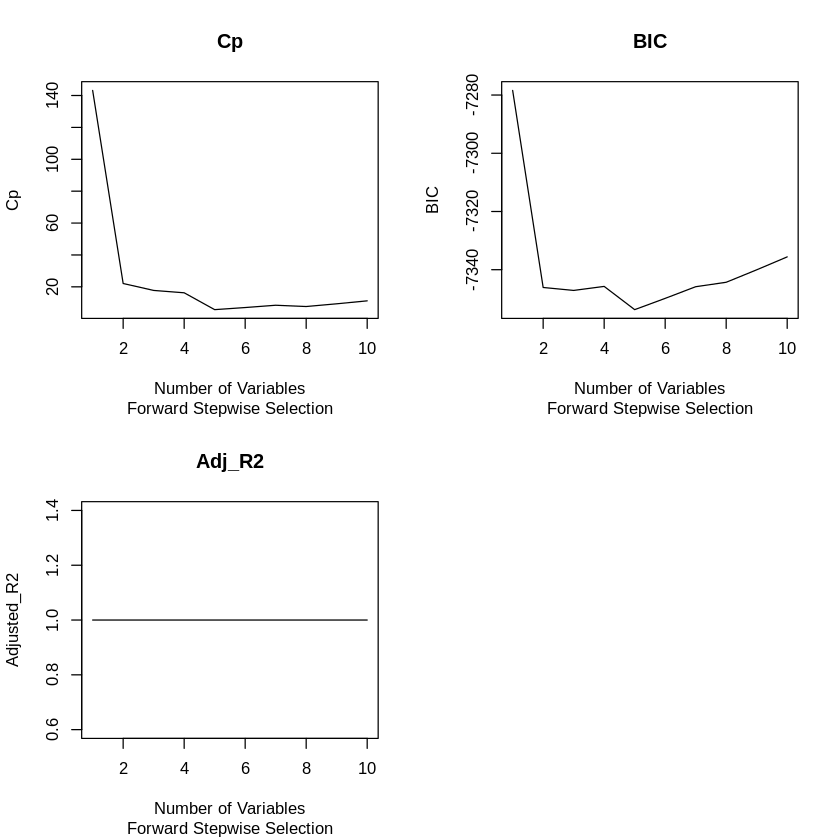

In [ ]:
par(mfrow = c(2, 2))

plot(reg_fwd_summary$cp, xlab = "Number of Variables",
     ylab = "Cp", type = "l")
title(main = "Cp", sub = "Forward Stepwise Selection")
plot(reg_fwd_summary$bic, xlab = "Number of Variables",
     ylab = "BIC", type = "l")
title(main = "BIC", sub = "Forward Stepwise Selection")
plot(reg_fwd_summary$adjr2, xlab = "Number of Variables",
     ylab = "Adjusted_R2", type = "l")
title(main = "Adj_R2", sub = "Forward Stepwise Selection")

In [ ]:
print(which.max(reg_fwd_summary$adjr2))
print(which.min(reg_fwd_summary$cp))
print(which.min(reg_fwd_summary$bic))

[1] 1
[1] 5
[1] 5


***Backward Stepwise Selection***

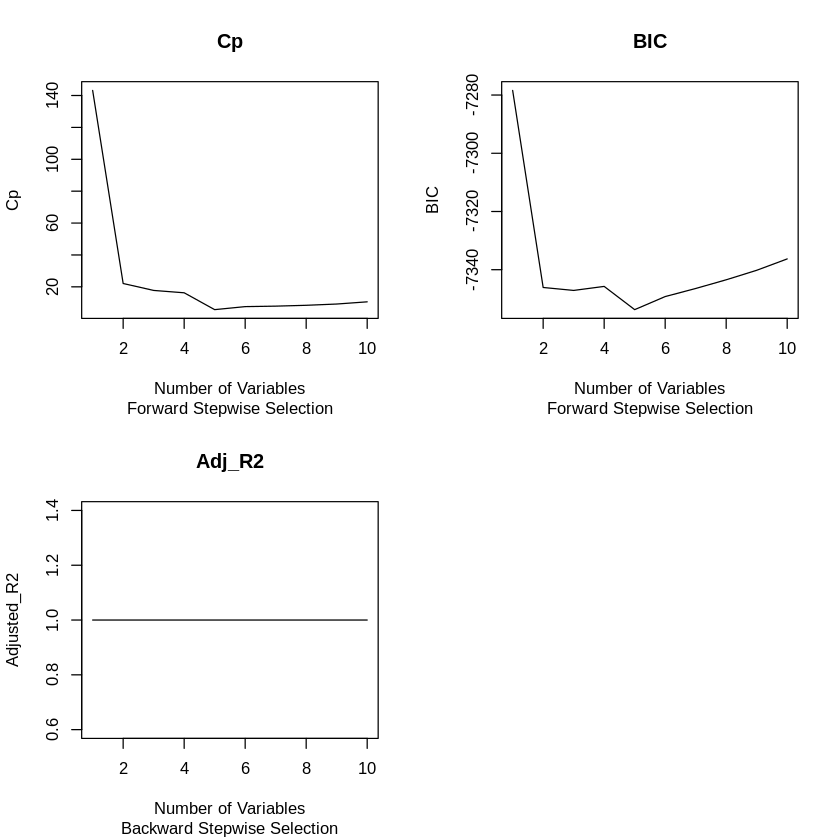

In [ ]:
par(mfrow = c(2, 2))

plot(reg_bwd_summary$cp, xlab = "Number of Variables",
     ylab = "Cp", type = "l")
title(main = "Cp", sub = "Forward Stepwise Selection")
plot(reg_bwd_summary$bic, xlab = "Number of Variables",
     ylab = "BIC", type = "l")
title(main = "BIC", sub = "Forward Stepwise Selection")
plot(reg_bwd_summary$adjr2, xlab = "Number of Variables",
     ylab = "Adjusted_R2", type = "l")
title(main = "Adj_R2", sub = "Backward Stepwise Selection")

In [ ]:
print(which.max(reg_bwd_summary$adjr2))
print(which.min(reg_bwd_summary$cp))
print(which.min(reg_bwd_summary$bic))

[1] 1
[1] 5
[1] 5


Unlike *best subset selection*, both forward and backward stepwise selection displays distinct number of best variables to be included within the model. For instance, based on adjusted $R^2$, $C_p$, and $BIC$ the stepwise selection shows that the best models correspond to 1, 7, and 3 variables, respectively.   

(e) Now fit a lasso model to the simulated data, again using $X, X^2, ..., X^{10}$ as predictors. Use cross-validation error as a function of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.

In [ ]:
#tidyverse for easy data manipulation and visualization
#caret for easy machine learning workflow
install.packages("tidyverse")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(tidyverse)
library(caret)
# Split the data into training and test set
set.seed(1)
training.samples <- df$y |>
  createDataPartition(p = 0.75, list = FALSE)
train.data  <- df[training.samples, ]
test.data <- df[-training.samples, ]

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:pls’:

    R2




In [ ]:
# Create a vector containing all possible lambda values
grid <- 10^seq(10, -2, length = 100)

# Prepare x (predictor matrix) and y (response vector) explicitly
x_train_matrix <- as.matrix(train.data[, -which(names(train.data) == "y")])
y_train_vector <- train.data$y

In [ ]:
print(head(x_train_matrix))

            X         X2           X3          X4            X5           X6
1  -0.6264538 0.39244438 -0.245848275 0.154012589 -0.0964817733 6.044137e-02
2   0.1836433 0.03372487  0.006193347 0.001137367  0.0002088698 3.835755e-05
3  -0.8356286 0.69827518 -0.583498718 0.487588224 -0.4074426711 3.404708e-01
5   0.3295078 0.10857537  0.035776429 0.011788611  0.0038844391 1.279953e-03
7   0.4874291 0.23758708  0.115806846 0.056447621  0.0275142105 1.341123e-02
10 -0.3053884 0.09326207 -0.028481152 0.008697813 -0.0026562111 8.111760e-04
              X7           X8            X9          X10
1  -3.786373e-02 2.371988e-02 -1.485941e-02 9.308733e-03
2   7.044108e-06 1.293603e-06  2.375616e-07 4.362661e-08
3  -2.845071e-01 2.377423e-01 -1.986642e-01 1.660095e-01
5   4.217544e-04 1.389714e-04  4.579214e-05 1.508887e-05
7   6.537021e-03 3.186334e-03  1.553112e-03 7.570318e-04
10 -2.477237e-04 7.565195e-05 -2.310323e-05 7.055458e-06


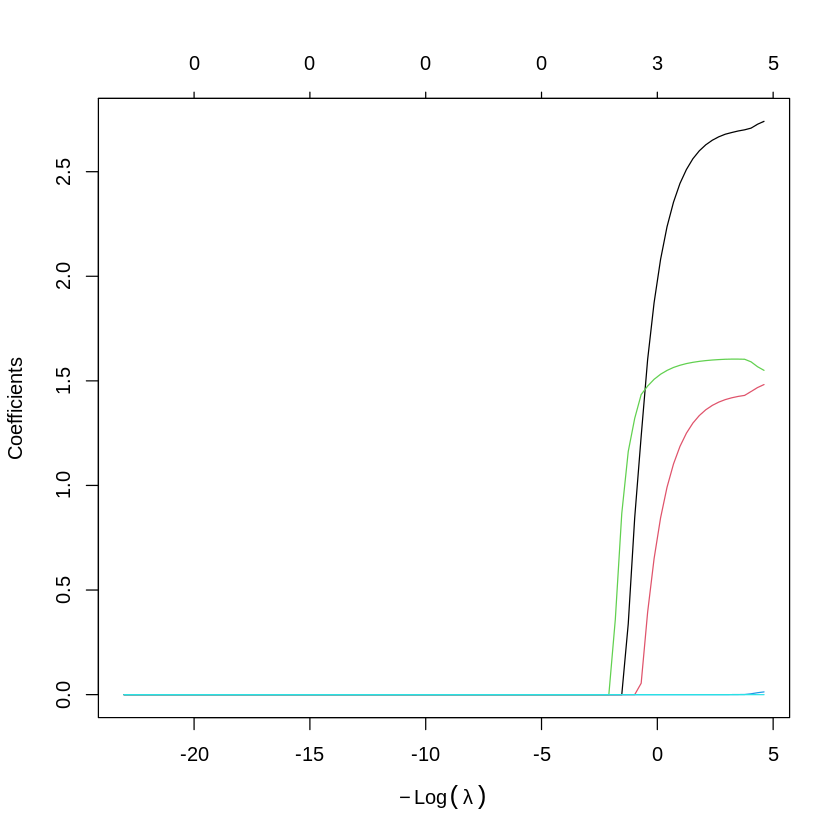

In [ ]:
# Run the Lasso model with training data
lasso_model <- glmnet(x_train_matrix, y_train_vector, alpha = 1, lambda = grid)
plot(lasso_model)

[1] 0.2419789


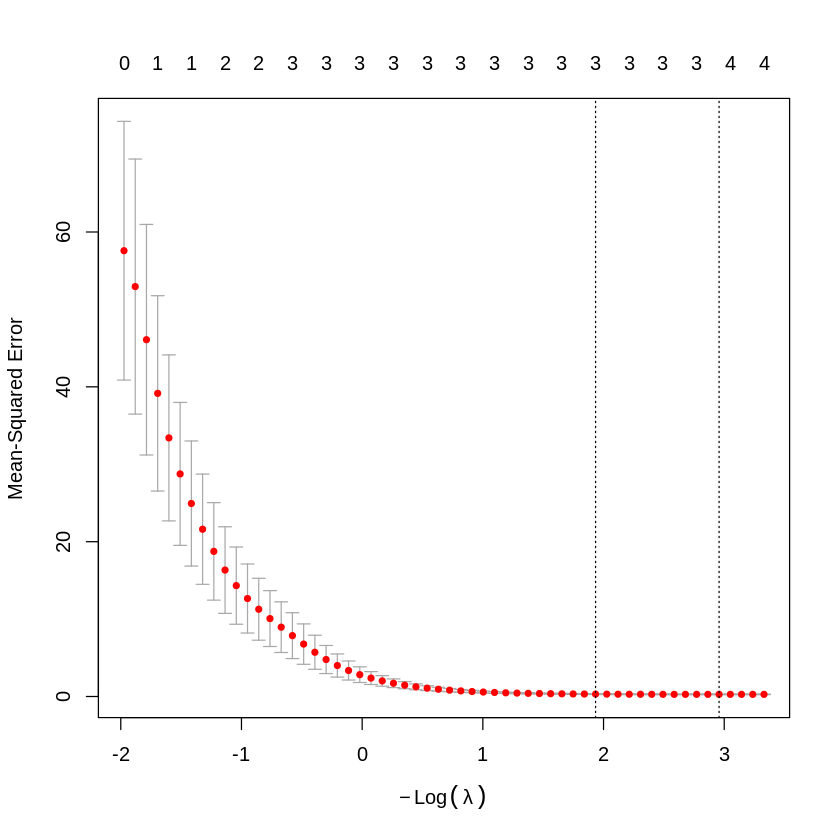

In [ ]:
set.seed(1)

# Prepare x (predictor matrix) and y (response vector) explicitly for cross-validation
x_train_matrix <- as.matrix(train.data[, -which(names(train.data) == "y")])
y_train_vector <- train.data$y

# Perform cross-validation for Lasso
cv.out <- cv.glmnet(x_train_matrix, y_train_vector, alpha = 1)
plot(cv.out)
bestlambda <- cv.out$lambda.min

# Prepare x_test_matrix for prediction
x_test_matrix <- as.matrix(test.data[, -which(names(test.data) == "y")])
y_test_vector <- test.data$y

# Make predictions on the test set
lasso.pred <- predict(lasso_model, s = bestlambda, newx = x_test_matrix)
print(mean((lasso.pred - y_test_vector)^2))

In [ ]:
# Prepare x (full predictor matrix) and y (full response vector) explicitly
x_full_matrix <- as.matrix(df[, -which(names(df) == "y")])
y_full_vector <- df$y

# Fit the Lasso model on the full data with the best lambda
out <- glmnet(x_full_matrix, y_full_vector, alpha = 1, lambda = grid)
lasso.coeff <- predict(out, type = "coefficients", s = bestlambda)[1:11, ]
print(lasso.coeff)

(Intercept)           X          X2          X3          X4          X5 
   4.145794    2.720833    1.419979    1.596046    0.000000    0.000000 
         X6          X7          X8          X9         X10 
   0.000000    0.000000    0.000000    0.000000    0.000000 


In [ ]:
print(lasso.coeff[lasso.coeff != 0])

(Intercept)           X          X2          X3 
   4.145794    2.720833    1.419979    1.596046 


**Discussion**: Based on the results provided by  the Lasso regression, we can infere that the best model is the one containing only the coefficients belonging to $X, X^2$, and $X^3$. In this specific case--employing simulated data--the Lasso regression provides better results with its cross-validation for lambda parameter tunning than the best subset selection and forward/backward stepwise selection methodologies.

(f) Now generate a response vector $Y$ according to the model

$$Y = \beta_0 + \beta_7X^7 + \epsilon,$$

and perform best subset selection and the lasso. Discuss the results obtained.



In [ ]:
beta.0 <- pi
beta.7 <- sqrt(3)
epsilon <- rnorm(n = n, mean = 0, sd = 1)
new_y <- beta.0 + beta.7*X^7 + epsilon
df$y_new <- new_y
print(head(df))

           X         y         X2           X3          X4            X5
1 -0.6264538  2.268632 0.39244438 -0.245848275 0.154012589 -0.0964817733
2  0.1836433  5.582146 0.03372487  0.006193347 0.001137367  0.0002088698
3 -0.8356286  2.271862 0.69827518 -0.583498718 0.487588224 -0.4074426711
4  1.5952808 19.101161 2.54492084  4.059863355 6.476622070 10.3320308510
5  0.3295078  5.440817 0.10857537  0.035776429 0.011788611  0.0038844391
6 -0.8204684  2.810758 0.67316837 -0.552313364 0.453155653 -0.3717998868
            X6            X7           X8            X9          X10     y_new
1 6.044137e-02 -3.786373e-02 2.371988e-02 -1.485941e-02 9.308733e-03  5.477629
2 3.835755e-05  7.044108e-06 1.293603e-06  2.375616e-07 4.362661e-08  3.102365
3 3.404708e-01 -2.845071e-01 2.377423e-01 -1.986642e-01 1.660095e-01  3.338551
4 1.648249e+01  2.629420e+01 4.194663e+01  6.691666e+01 1.067509e+02 48.712486
5 1.279953e-03  4.217544e-04 1.389714e-04  4.579214e-05 1.508887e-05  2.399050
6 3.050501e-01 

***Best Subset Selection***



In [ ]:
reg_subset <- regsubsets(y_new ~ X + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10,
                         data = df, nvmax = 10)
print(summary(reg_subset))

Subset selection object
Call: regsubsets.formula(y_new ~ X + X2 + X3 + X4 + X5 + X6 + X7 + 
    X8 + X9 + X10, data = df, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " " " " " " " " " "*" " " " " " "
2  ( 1 )  " " "*" " " " " " " " " "*" " " " " " "
3  ( 1 )  "*" " " " " "*" " " " " "*" " " " " " "
4  ( 1 )  "*" "*" "*" " " " " " " "*" " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" " " "*" " " " " " "
6  ( 1 )  "*" "*" "*" " " "*" " " "*" " " "*" " "
7  ( 1 )  "*" " " "*" " " "*" " " "*" "*" "*" "*"
8  ( 1 )  "*" " " "*" " " "*" "*" "*" "*" "*" "*"
9  ( 1 )  "*" " " "*" "*" "*" "*" "*" "*" "*" "

In [ ]:
reg_subset_summary <- summary(reg_subset)

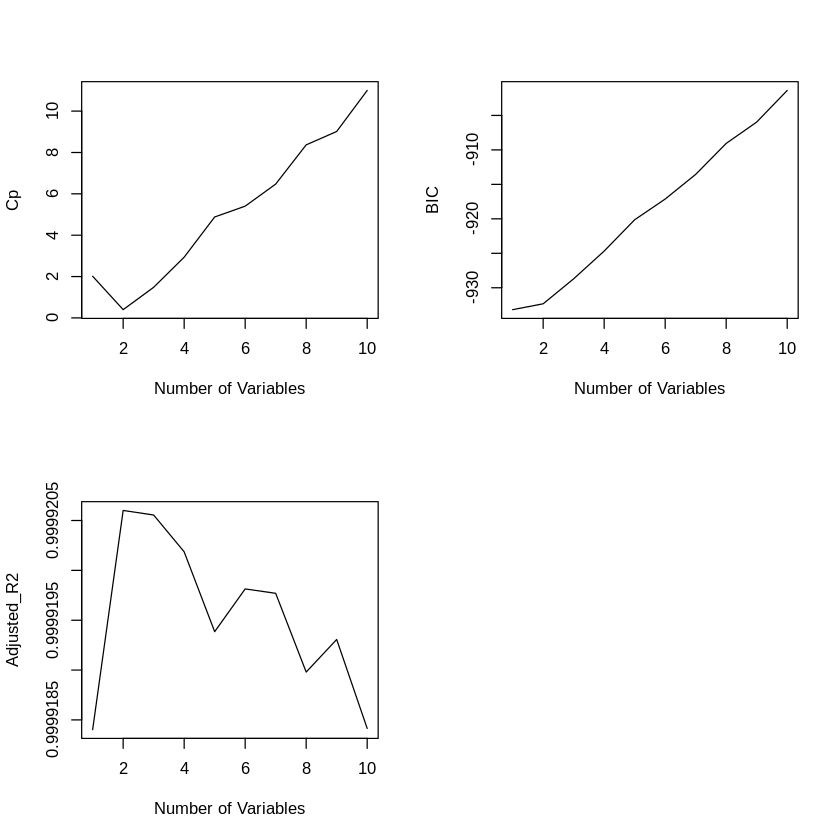

In [ ]:
par(mfrow = c(2, 2))
plot(reg_subset_summary$cp, xlab = "Number of Variables",
     ylab = "Cp", type = "l")
plot(reg_subset_summary$bic, xlab = "Number of Variables",
     ylab = "BIC", type = "l")
plot(reg_subset_summary$adjr2, xlab = "Number of Variables",
     ylab = "Adjusted_R2", type = "l")

In [ ]:
print(which.max(reg_subset_summary$adjr2))
print(which.min(reg_subset_summary$cp))
print(which.min(reg_subset_summary$bic))

[1] 2
[1] 2
[1] 1


***The Lasso Regression***

In [ ]:
train.data  <- df[training.samples, ]
test.data <- df[-training.samples, ]

In [ ]:
# Create a vector containing all possible lambda values
grid <- 10^seq(10, -2, length = 100)

# Prepare x (predictor matrix) and y (response vector) explicitly
x_train.data <- as.matrix(train.data[, !names(train.data) %in% c("y", "y_new")])
y_train.data <- train.data$y_new

In [ ]:
print(head(x_train.data))

            X         X2           X3          X4            X5           X6
1  -0.6264538 0.39244438 -0.245848275 0.154012589 -0.0964817733 6.044137e-02
2   0.1836433 0.03372487  0.006193347 0.001137367  0.0002088698 3.835755e-05
3  -0.8356286 0.69827518 -0.583498718 0.487588224 -0.4074426711 3.404708e-01
5   0.3295078 0.10857537  0.035776429 0.011788611  0.0038844391 1.279953e-03
7   0.4874291 0.23758708  0.115806846 0.056447621  0.0275142105 1.341123e-02
10 -0.3053884 0.09326207 -0.028481152 0.008697813 -0.0026562111 8.111760e-04
              X7           X8            X9          X10
1  -3.786373e-02 2.371988e-02 -1.485941e-02 9.308733e-03
2   7.044108e-06 1.293603e-06  2.375616e-07 4.362661e-08
3  -2.845071e-01 2.377423e-01 -1.986642e-01 1.660095e-01
5   4.217544e-04 1.389714e-04  4.579214e-05 1.508887e-05
7   6.537021e-03 3.186334e-03  1.553112e-03 7.570318e-04
10 -2.477237e-04 7.565195e-05 -2.310323e-05 7.055458e-06


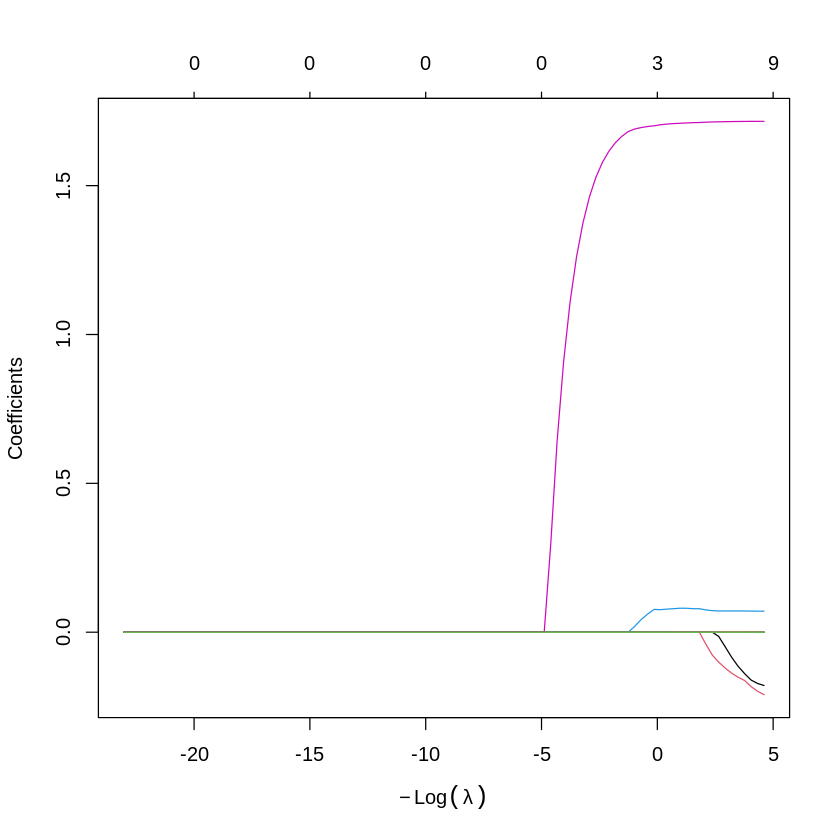

In [ ]:
# Run the Lasso model with training data
lasso_model_f <- glmnet(x_train.data, y_train.data, alpha = 1, lambda = grid)
plot(lasso_model_f)

Warning message in lasso.pred_f - y_test_vector:
“longer object length is not a multiple of shorter object length”


[1] 13889.92


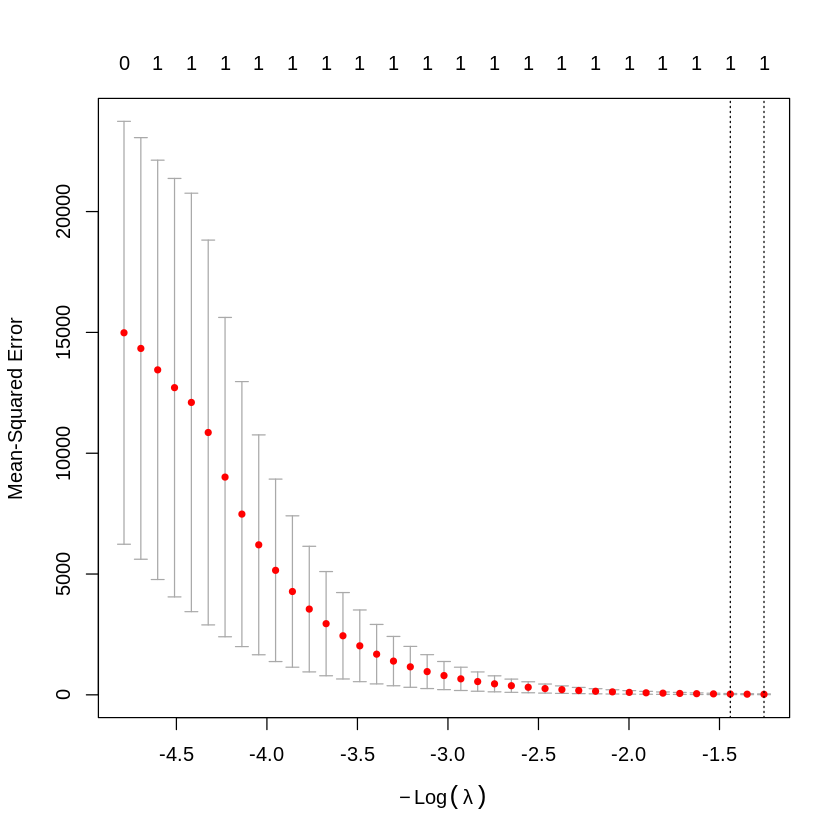

In [ ]:
# Perform cross-validation for Lasso
cv.out_f <- cv.glmnet(x_train.data, y_train.data, alpha = 1)
plot(cv.out_f)
bestlambda <- cv.out_f$lambda.min

# Prepare x_test_matrix for prediction
x_test.data <- as.matrix(train.data[, !names(test.data) %in% c("y", "y_new")])
y_test_vector <- test.data$y_new

# Make predictions on the test set
lasso.pred_f <- predict(lasso_model_f, s = bestlambda, newx = x_test.data)
print(mean((lasso.pred_f - y_test_vector)^2))

In [ ]:
# Prepare x (full predictor matrix) and y (full response vector) explicitly
x_full_matrix <- as.matrix(df[, !names(df) %in% c("y", "y_new")])
y_full_vector <- df$y_new

In [ ]:
# Fit the Lasso model on the full data with the best lambda
out_f <- glmnet(x_full_matrix, y_full_vector, alpha = 1, lambda = grid)
lasso.coeff_f <- predict(out_f, type = "coefficients", s = bestlambda)[1:11, ]
print(lasso.coeff_f)

(Intercept)           X          X2          X3          X4          X5 
   3.327863    0.000000    0.000000    0.000000    0.000000    0.000000 
         X6          X7          X8          X9         X10 
   0.000000    1.674391    0.000000    0.000000    0.000000 


In [ ]:
print(lasso.coeff_f[lasso.coeff_f != 0])

(Intercept)          X7 
   3.327863    1.674391 


2. In this exercise, we will predict the number of applications received using the other variables in the `College` data set.

(a) Split the data into a training set and a test set.

In [ ]:
print(head(College))

                             Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University     Yes 1660   1232    721        23        52
Adelphi University               Yes 2186   1924    512        16        29
Adrian College                   Yes 1428   1097    336        22        50
Agnes Scott College              Yes  417    349    137        60        89
Alaska Pacific University        Yes  193    146     55        16        44
Albertson College                Yes  587    479    158        38        62
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University        2885         537     7440       3300   450
Adelphi University                  2683        1227    12280       6450   750
Adrian College                      1036          99    11250       3750   400
Agnes Scott College                  510          63    12960       5450   450
Alaska Pacific University            249         869     7560       4120 

Checking if there are any missing values:

In [ ]:
print(sum(is.na(College)))

[1] 0


In [ ]:
print(str(College))

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [ ]:
print(names(College))

 [1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"  


In [ ]:
# Split data into training and test
set.seed(1)
training.samples <- College$Apps |>
  createDataPartition(p = 0.75, list = FALSE)
train.data  <- College[training.samples, ]
test.data <- College[-training.samples, ]
print(dim(train.data))
print(dim(test.data))

[1] 585  18
[1] 192  18


(b) Fit a linear model using least squares on the training set, and report the test error obtained.

***Linear Regression (Least Squares)***

In [ ]:
linear_OLS <- lm(Apps ~ ., data = train.data)
print(summary(linear_OLS))


Call:
lm(formula = Apps ~ ., data = train.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4999.4  -409.7   -28.0   306.0  7756.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -310.33657  474.89424  -0.653 0.513708    
PrivateYes  -538.64786  154.75433  -3.481 0.000539 ***
Accept         1.65132    0.04581  36.051  < 2e-16 ***
Enroll        -0.96794    0.21863  -4.427 1.14e-05 ***
Top10perc     47.06023    6.32099   7.445 3.62e-13 ***
Top25perc    -10.34140    5.02039  -2.060 0.039866 *  
F.Undergrad    0.02759    0.03860   0.715 0.475018    
P.Undergrad    0.07119    0.03546   2.008 0.045150 *  
Outstate      -0.08544    0.02167  -3.943 9.07e-05 ***
Room.Board     0.12193    0.05600   2.177 0.029860 *  
Books          0.14374    0.30924   0.465 0.642255    
Personal       0.03992    0.07341   0.544 0.586822    
PhD           -9.37873    5.39588  -1.738 0.082731 .  
Terminal      -0.74838    5.82306  -0.129 0.897784    
S.F.Ratio      6.

**Test Error**

In [ ]:
drops <- c("Apps")
test.data_X <- test.data[ , !(names(test.data) %in% drops)]
print(head(test.data_X))

                               Private Accept Enroll Top10perc Top25perc
Albertson College                  Yes    479    158        38        62
Albertus Magnus College            Yes    340    103        17        45
Alderson-Broaddus College          Yes    498    172        21        44
Alverno College                    Yes    313    157        23        46
American International College     Yes   1093    220         9        22
Amherst College                    Yes    992    418        83        96
                               F.Undergrad P.Undergrad Outstate Room.Board
Albertson College                      678          41    13500       3335
Albertus Magnus College                416         230    13290       5720
Alderson-Broaddus College              799          78    10468       3380
Alverno College                       1317        1235     8352       3640
American International College        1018         287     8700       4780
Amherst College                       1

In [ ]:
print(dim(test.data))
print(dim(test.data_X))

[1] 192  18
[1] 192  17


In [ ]:
lm.pred <- predict(linear_OLS, newdata = test.data_X)
MSE.lm <- mean((test.data$Apps - lm.pred)^2)
print(MSE.lm)

[1] 1185917


(c) Fit a ridge regression on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

***Ridge Regression***

In [ ]:
x.r.train <- model.matrix(Apps ~ ., train.data)[, -1]
y.r.train <- train.data$Apps
x.r.test <- model.matrix(Apps ~ ., test.data)[, -1]
y.r.test <- test.data$Apps

[1] 368.1143


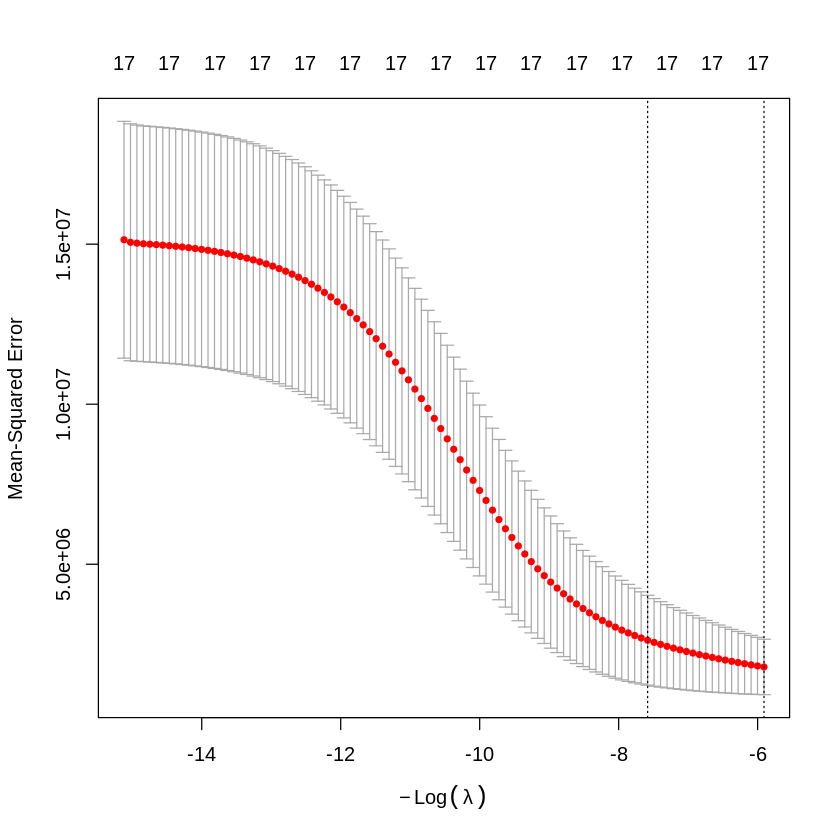

In [ ]:
set.seed(1)
cv.out <- cv.glmnet(x.r.train, y.r.train, alpha = 0)
plot(cv.out)
bestlam.ridge <- cv.out$lambda.min
print(bestlam.ridge)

We now compute the ridge Mean Square Error (MSE.ridge)

In [ ]:
grid <- 10^seq(10, -2, length = 100)
ridge.model <- glmnet(x.r.train, y.r.train,
                      alpha = 0, lambda = bestlam.ridge, thresh = 1e-12)
ridge.pred <- predict(ridge.model, newx = x.r.test)
MSE.ridge <- mean((ridge.pred - y.r.test)^2)
print(MSE.ridge)

[1] 1231301


(d) Fit a lsso model on the training set, with $\lambda$ chosen by cross-validation. Resport the test error obtined, long with the number of non-zero coefficient etimates.

***Lasso Model***

[1] 1195525


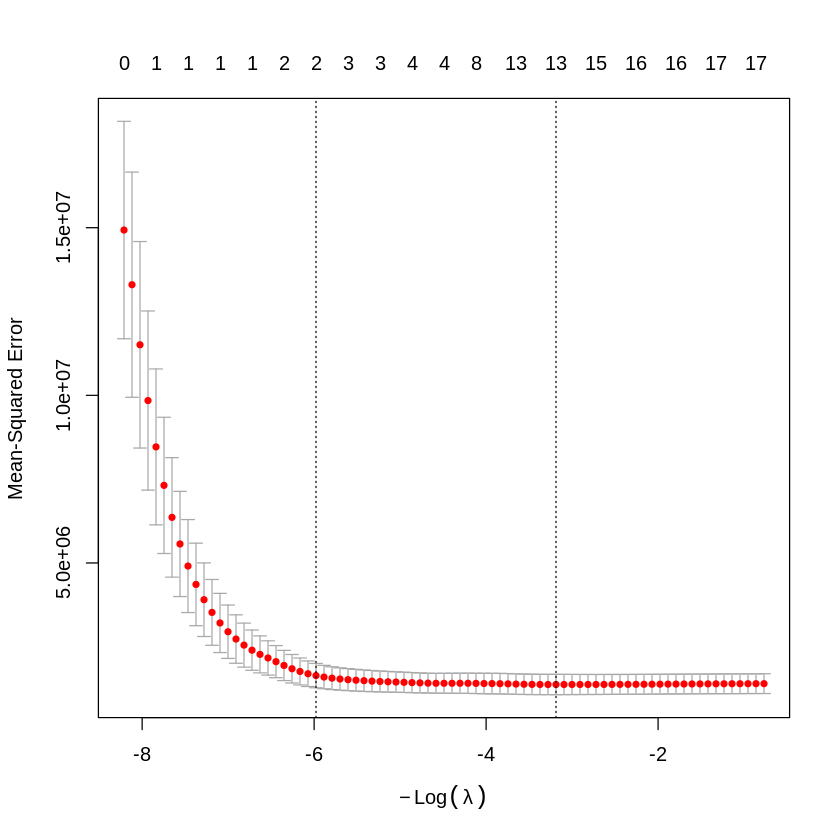

In [ ]:
# Perform cross-validation for Lasso
cv.lasso <- cv.glmnet(x.r.train, y.r.train, alpha = 1)
bestlambda_lasso <- cv.lasso$lambda.min
plot(cv.lasso)

# Make predictions on the test set
lasso.pred <- predict(cv.lasso, s = bestlambda_lasso, newx = x.r.test)
MSE.lasso <- mean((lasso.pred - y.r.test)^2)
print(MSE.lasso)

In [ ]:
print(names(College))

 [1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"  


In [ ]:
# Prepare x (full predictor matrix) and y (full response vector) explicitly
x_full_matrix <- as.matrix(College[, !names(College) %in% c("Apps")])
y_full_vector <- College$Apps
# Fit the Lasso model on the full data with the best lambda
out_lasso <- glmnet(x_full_matrix, y_full_vector,
                    alpha = 1, lambda = bestlambda_lasso)
lasso.coeff_lasso <- predict(out_lasso, type = "coefficients",
                             s = bestlambda_lasso)[1:17, ]
print(lasso.coeff_lasso)

Warning message in storage.mode(x) <- "double":
“NAs introduced by coercion”


  (Intercept)       Private        Accept        Enroll     Top10perc 
-1.018825e+03  0.000000e+00  1.445115e+00 -1.011591e-01  3.165845e+01 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
-1.211791e+00  0.000000e+00  2.377296e-02 -7.501505e-02  1.074081e-01 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 0.000000e+00  0.000000e+00 -3.552991e+00 -1.636333e+00  9.713868e+00 
  perc.alumni        Expend 
-2.225370e+00  7.204401e-02 


**Non-zero Lasso coefficient estimates**

In [ ]:
print(lasso.coeff_lasso[lasso.coeff_lasso != 0])

  (Intercept)        Accept        Enroll     Top10perc     Top25perc 
-1.018825e+03  1.445115e+00 -1.011591e-01  3.165845e+01 -1.211791e+00 
  P.Undergrad      Outstate    Room.Board           PhD      Terminal 
 2.377296e-02 -7.501505e-02  1.074081e-01 -3.552991e+00 -1.636333e+00 
    S.F.Ratio   perc.alumni        Expend 
 9.713868e+00 -2.225370e+00  7.204401e-02 


(e) Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [ ]:
print(head(train.data))

                             Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University     Yes 1660   1232    721        23        52
Adelphi University               Yes 2186   1924    512        16        29
Adrian College                   Yes 1428   1097    336        22        50
Agnes Scott College              Yes  417    349    137        60        89
Alaska Pacific University        Yes  193    146     55        16        44
Albion College                   Yes 1899   1720    489        37        68
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University        2885         537     7440       3300   450
Adelphi University                  2683        1227    12280       6450   750
Adrian College                      1036          99    11250       3750   400
Agnes Scott College                  510          63    12960       5450   450
Alaska Pacific University            249         869     7560       4120 

In [ ]:
set.seed(2)
pcr.fit <- pcr(Apps ~ ., data = train.data, scale = TRUE, validation = "CV")

In [ ]:
print(summary(pcr.fit))

Data: 	X dimension: 585 17 
	Y dimension: 585 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3893     3833     2063     2043     1892     1675     1677
adjCV         3893     3835     2061     2042     1860     1667     1674
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1660     1631     1583      1578      1582      1584      1585
adjCV     1654     1628     1579      1573      1578      1580      1581
       14 comps  15 comps  16 comps  17 comps
CV         1586      1583      1237      1190
adjCV      1582      1572      1225      1180

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.027    56.89    63.90    69.61    75.21    80.27    83.75    87.19
Apps    3.443    72.18    73.13    78.79    82.35    82.36    83.14    83.6

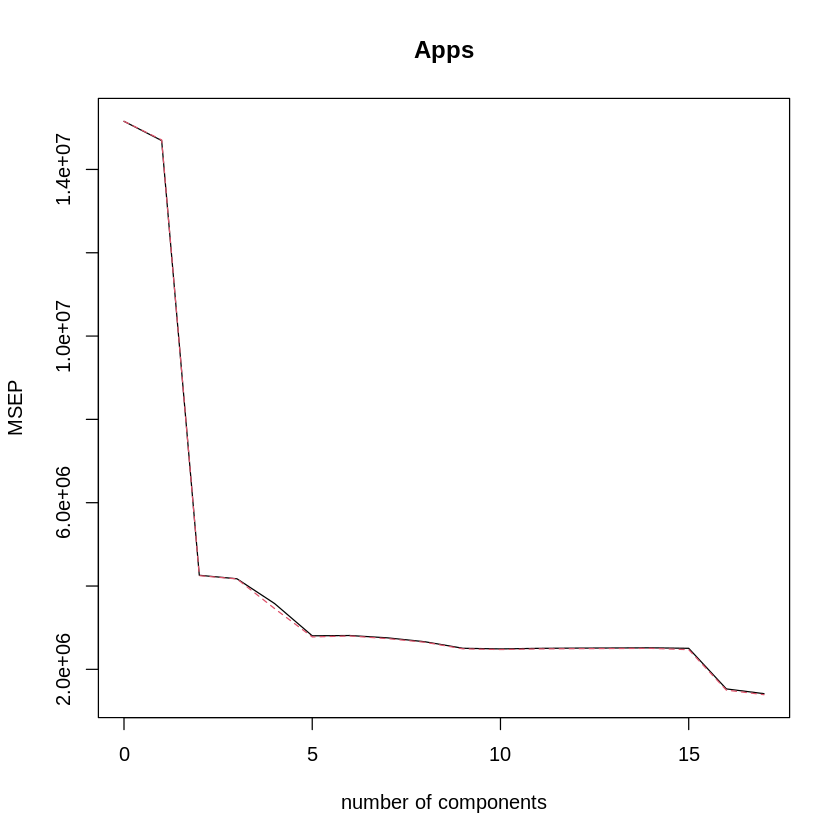

In [ ]:
validationplot(pcr.fit, val.type = "MSEP")

In [ ]:
pcr.pred <- predict(pcr.fit, x.r.test, ncomp = 17)
pcr.MSE <- mean((pcr.pred - y.r.test)^2)
print(pcr.MSE)

[1] 1185917


As we can observe from the results above, the PCR with $M = 17$ components has the lowest cross-validation MSE.  

(f) Fit a PLS model on the training set, with $M$ chosen by cross-validation.
Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [ ]:
set.seed(2)
plsr.fit <- plsr(Apps ~ ., data = train.data, scale = TRUE, validation = "CV")

In [ ]:
print(summary(plsr.fit))

Data: 	X dimension: 585 17 
	Y dimension: 585 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3893     1894     1636     1519     1478     1366     1231
adjCV         3893     1892     1634     1513     1461     1348     1218
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1210     1200     1196      1195      1192      1190      1190
adjCV     1199     1190     1186      1185      1182      1180      1180
       14 comps  15 comps  16 comps  17 comps
CV         1190      1190      1190      1190
adjCV      1180      1180      1180      1180

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       26.06    40.43    62.26    65.52    69.52    73.36    76.18    79.78
Apps    77.09    84.33    86.96    90.16    92.10    92.86    92.93    

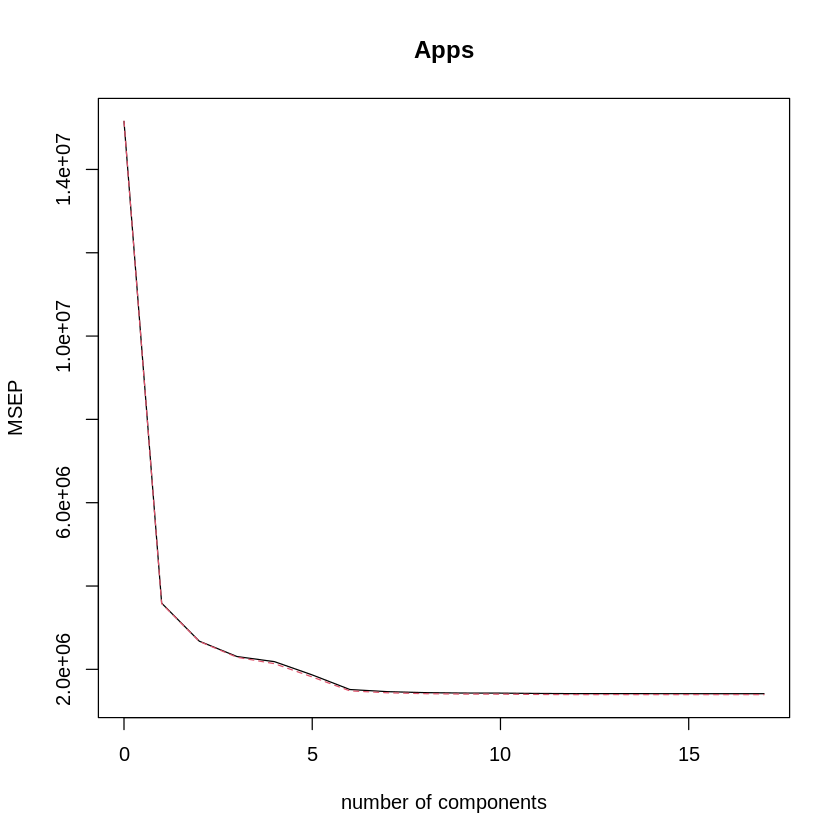

In [ ]:
validationplot(plsr.fit, val.type = "MSEP")

In [ ]:
MSE_object <- MSEP(plsr.fit)

In [ ]:
# To geat acces to the CV values
print(which.min(MSE_object$val[1, 1, ]))

17 comps 
      18 


In [ ]:
print(plsr.fit$validation)

$method
[1] "CV"

$pred
, , 1 comps

                                                     Apps
Abilene Christian University                  1977.100724
Adelphi University                             179.276174
Adrian College                                  51.919546
Agnes Scott College                           2746.362947
Alaska Pacific University                      681.731307
Albion College                                3036.755028
Albright College                              1482.779926
Alfred University                             2647.895727
Allegheny College                             2580.512483
Allentown Coll. of St. Francis de Sales       1661.728938
Alma College                                  2052.112964
Anderson University                            -18.709442
Angelo State University                       3037.817418
Antioch University                            1764.319984
Appalachian State University                  6379.565905
Arizona State University Main campu

In [ ]:
pcr.pred <- predict(pcr.fit, x.r.test, ncomp = 17)
pcr.MSE <- mean((pcr.pred - y.r.test)^2)
print(pcr.MSE)